# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp2 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1337596087281070103
1337596088098942977
1337596089457840130
1337596089575346179
1337596092456775681
1337596092959977473
1337596093476052993
1337596093773836288
1337596093958291458
1337596094130208769
1337596094713376771
1337596095094947843
1337596098425225216
1337596098823811072
1337596098769252352
1337596100740444160
1337596101046673409
1337596101319389184
1337596102221197318
1337596102799921152
1337596103961628673
1337596104607555584
1337596106369363969
1337596107178700802
1337596108328103936
1337596109384986624
1337596109993234432
1337596110215536641
1337596109741563904
1337596110483775490
1337596111234723841
1337596111654187008
1337596112107167744
1337596112581103617
1337596113084444673
1337596114313285632
1337596113897934855
1337596115429056512
1337596115982692352
1337596116376829952
1337596116959961096
1337596117165383681
1337596117333241856
1337596118645972994
1337596119300198403
1337596120122322944
1337596120604794884
1337596120839630850
1337596122303369216
1337596123788304385


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q,) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sat Dec 12 03:14:25 +0000 2020'
'Sat Dec 12 03:14:24 +0000 2020'
'Sat Dec 12 03:14:24 +0000 2020'
'Sat Dec 12 03:14:24 +0000 2020'
'Sat Dec 12 03:14:23 +0000 2020'
'Sat Dec 12 03:14:23 +0000 2020'
'Sat Dec 12 03:14:22 +0000 2020'
'Sat Dec 12 03:14:22 +0000 2020'
'Sat Dec 12 03:14:22 +0000 2020'
'Sat Dec 12 03:14:22 +0000 2020'
'Sat Dec 12 03:14:22 +0000 2020'
'Sat Dec 12 03:14:21 +0000 2020'
'Sat Dec 12 03:14:21 +0000 2020'
'Sat Dec 12 03:14:21 +0000 2020'
'Sat Dec 12 03:14:20 +0000 2020'
'Sat Dec 12 03:14:20 +0000 2020'
'Sat Dec 12 03:14:20 +0000 2020'
'Sat Dec 12 03:14:19 +0000 2020'
'Sat Dec 12 03:14:19 +0000 2020'
'Sat Dec 12 03:14:18 +0000 2020'
'Sat Dec 12 03:14:18 +0000 2020'
'Sat Dec 12 03:14:18 +0000 2020'
'Sat Dec 12 03:14:18 +0000 2020'
'Sat Dec 12 03:14:17 +0000 2020'
'Sat Dec 12 03:14:17 +0000 2020'
'Sat Dec 12 03:14:17 +0000 2020'
'Sat Dec 12 03:14:17 +0000 2020'
'Sat Dec 12 03:14:16 +0000 2020'
'Sat Dec 12 03:14:16 +0000 2020'
'Sat Dec 12 03:14:16 +0000 2020'
'Sat Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [10]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sat Dec 12 03:13:55 +0000 2020'
'Sat Dec 12 03:13:55 +0000 2020'
'Sat Dec 12 03:13:54 +0000 2020'
'Sat Dec 12 03:13:54 +0000 2020'
'Sat Dec 12 03:13:54 +0000 2020'
'Sat Dec 12 03:13:54 +0000 2020'
'Sat Dec 12 03:13:53 +0000 2020'
'Sat Dec 12 03:13:53 +0000 2020'
'Sat Dec 12 03:13:53 +0000 2020'
'Sat Dec 12 03:13:51 +0000 2020'
'Sat Dec 12 03:13:51 +0000 2020'
'Sat Dec 12 03:13:50 +0000 2020'
'Sat Dec 12 03:13:49 +0000 2020'
'Sat Dec 12 03:13:49 +0000 2020'
'Sat Dec 12 03:13:48 +0000 2020'
'Sat Dec 12 03:13:48 +0000 2020'
'Sat Dec 12 03:13:48 +0000 2020'
'Sat Dec 12 03:13:48 +0000 2020'
'Sat Dec 12 03:13:47 +0000 2020'
'Sat Dec 12 03:13:47 +0000 2020'
'Sat Dec 12 03:13:47 +0000 2020'
'Sat Dec 12 03:13:46 +0000 2020'
'Sat Dec 12 03:13:46 +0000 2020'
'Sat Dec 12 03:13:46 +0000 2020'
'Sat Dec 12 03:13:46 +0000 2020'
'Sat Dec 12 03:13:44 +0000 2020'
'Sat Dec 12 03:13:44 +0000 2020'
'Sat Dec 12 03:13:44 +0000 2020'
'Sat Dec 12 03:13:44 +0000 2020'
'Sat Dec 12 03:13:44 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:12:12 +0000 2020'
'Sat Dec 12 03:12:12 +0000 2020'
'Sat Dec 12 03:12:11 +0000 2020'
'Sat Dec 12 03:12:11 +0000 2020'
'Sat Dec 12 03:12:11 +0000 2020'
'Sat Dec 12 03:12:10 +0000 2020'
'Sat Dec 12 03:12:10 +0000 2020'
'Sat Dec 12 03:12:10 +0000 2020'
'Sat Dec 12 03:12:08 +0000 2020'
'Sat Dec 12 03:12:08 +0000 2020'
'Sat Dec 12 03:12:08 +0000 2020'
'Sat Dec 12 03:12:08 +0000 2020'
'Sat Dec 12 03:12:08 +0000 2020'
'Sat Dec 12 03:12:07 +0000 2020'
'Sat Dec 12 03:12:07 +0000 2020'
'Sat Dec 12 03:12:07 +0000 2020'
'Sat Dec 12 03:12:07 +0000 2020'
'Sat Dec 12 03:12:07 +0000 2020'
'Sat Dec 12 03:12:07 +0000 2020'
'Sat Dec 12 03:12:06 +0000 2020'
'Sat Dec 12 03:12:06 +0000 2020'
'Sat Dec 12 03:12:06 +0000 2020'
'Sat Dec 12 03:12:06 +0000 2020'
'Sat Dec 12 03:12:05 +0000 2020'
'Sat Dec 12 03:12:05 +0000 2020'
'Sat Dec 12 03:12:05 +0000 2020'
'Sat Dec 12 03:12:05 +0000 2020'
'Sat Dec 12 03:12:05 +0000 2020'
'Sat Dec 12 03:12:04 +0000 2020'
'Sat Dec 12 03:12:04 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:10:59 +0000 2020'
'Sat Dec 12 03:10:58 +0000 2020'
'Sat Dec 12 03:10:58 +0000 2020'
'Sat Dec 12 03:10:57 +0000 2020'
'Sat Dec 12 03:10:57 +0000 2020'
'Sat Dec 12 03:10:56 +0000 2020'
'Sat Dec 12 03:10:56 +0000 2020'
'Sat Dec 12 03:10:56 +0000 2020'
'Sat Dec 12 03:10:55 +0000 2020'
'Sat Dec 12 03:10:55 +0000 2020'
'Sat Dec 12 03:10:55 +0000 2020'
'Sat Dec 12 03:10:55 +0000 2020'
'Sat Dec 12 03:10:55 +0000 2020'
'Sat Dec 12 03:10:55 +0000 2020'
'Sat Dec 12 03:10:55 +0000 2020'
'Sat Dec 12 03:10:54 +0000 2020'
'Sat Dec 12 03:10:54 +0000 2020'
'Sat Dec 12 03:10:54 +0000 2020'
'Sat Dec 12 03:10:54 +0000 2020'
'Sat Dec 12 03:10:54 +0000 2020'
'Sat Dec 12 03:10:53 +0000 2020'
'Sat Dec 12 03:10:53 +0000 2020'
'Sat Dec 12 03:10:53 +0000 2020'
'Sat Dec 12 03:10:53 +0000 2020'
'Sat Dec 12 03:10:53 +0000 2020'
'Sat Dec 12 03:10:52 +0000 2020'
'Sat Dec 12 03:10:52 +0000 2020'
'Sat Dec 12 03:10:52 +0000 2020'
'Sat Dec 12 03:10:51 +0000 2020'
'Sat Dec 12 03:10:51 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:09:59 +0000 2020'
'Sat Dec 12 03:09:59 +0000 2020'
'Sat Dec 12 03:09:58 +0000 2020'
'Sat Dec 12 03:09:58 +0000 2020'
'Sat Dec 12 03:09:58 +0000 2020'
'Sat Dec 12 03:09:58 +0000 2020'
'Sat Dec 12 03:09:58 +0000 2020'
'Sat Dec 12 03:09:57 +0000 2020'
'Sat Dec 12 03:09:57 +0000 2020'
'Sat Dec 12 03:09:56 +0000 2020'
'Sat Dec 12 03:09:56 +0000 2020'
'Sat Dec 12 03:09:56 +0000 2020'
'Sat Dec 12 03:09:55 +0000 2020'
'Sat Dec 12 03:09:55 +0000 2020'
'Sat Dec 12 03:09:55 +0000 2020'
'Sat Dec 12 03:09:54 +0000 2020'
'Sat Dec 12 03:09:54 +0000 2020'
'Sat Dec 12 03:09:54 +0000 2020'
'Sat Dec 12 03:09:54 +0000 2020'
'Sat Dec 12 03:09:52 +0000 2020'
'Sat Dec 12 03:09:52 +0000 2020'
'Sat Dec 12 03:09:51 +0000 2020'
'Sat Dec 12 03:09:51 +0000 2020'
'Sat Dec 12 03:09:51 +0000 2020'
'Sat Dec 12 03:09:51 +0000 2020'
'Sat Dec 12 03:09:50 +0000 2020'
'Sat Dec 12 03:09:50 +0000 2020'
'Sat Dec 12 03:09:50 +0000 2020'
'Sat Dec 12 03:09:50 +0000 2020'
'Sat Dec 12 03:09:50 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:08:42 +0000 2020'
'Sat Dec 12 03:08:42 +0000 2020'
'Sat Dec 12 03:08:41 +0000 2020'
'Sat Dec 12 03:08:41 +0000 2020'
'Sat Dec 12 03:08:40 +0000 2020'
'Sat Dec 12 03:08:40 +0000 2020'
'Sat Dec 12 03:08:40 +0000 2020'
'Sat Dec 12 03:08:40 +0000 2020'
'Sat Dec 12 03:08:40 +0000 2020'
'Sat Dec 12 03:08:39 +0000 2020'
'Sat Dec 12 03:08:39 +0000 2020'
'Sat Dec 12 03:08:39 +0000 2020'
'Sat Dec 12 03:08:39 +0000 2020'
'Sat Dec 12 03:08:38 +0000 2020'
'Sat Dec 12 03:08:38 +0000 2020'
'Sat Dec 12 03:08:37 +0000 2020'
'Sat Dec 12 03:08:37 +0000 2020'
'Sat Dec 12 03:08:37 +0000 2020'
'Sat Dec 12 03:08:37 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:35 +0000 2020'
'Sat Dec 12 03:08:34 +0000 2020'
'Sat Dec 12 03:08:34 +0000 2020'
'Sat Dec 12 03:08:33 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:07:31 +0000 2020'
'Sat Dec 12 03:07:30 +0000 2020'
'Sat Dec 12 03:07:30 +0000 2020'
'Sat Dec 12 03:07:29 +0000 2020'
'Sat Dec 12 03:07:29 +0000 2020'
'Sat Dec 12 03:07:29 +0000 2020'
'Sat Dec 12 03:07:28 +0000 2020'
'Sat Dec 12 03:07:28 +0000 2020'
'Sat Dec 12 03:07:28 +0000 2020'
'Sat Dec 12 03:07:28 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:27 +0000 2020'
'Sat Dec 12 03:07:26 +0000 2020'
'Sat Dec 12 03:07:26 +0000 2020'
'Sat Dec 12 03:07:26 +0000 2020'
'Sat Dec 12 03:07:25 +0000 2020'
'Sat Dec 12 03:07:24 +0000 2020'
'Sat Dec 12 03:07:24 +0000 2020'
'Sat Dec 12 03:07:24 +0000 2020'
'Sat Dec 12 03:07:24 +0000 2020'
'Sat Dec 12 03:07:23 +0000 2020'
'Sat Dec 12 03:07:23 +0000 2020'
'Sat Dec 12 03:07:22 +0000 2020'
'Sat Dec 12 03:07:22 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:06:26 +0000 2020'
'Sat Dec 12 03:06:26 +0000 2020'
'Sat Dec 12 03:06:26 +0000 2020'
'Sat Dec 12 03:06:26 +0000 2020'
'Sat Dec 12 03:06:25 +0000 2020'
'Sat Dec 12 03:06:25 +0000 2020'
'Sat Dec 12 03:06:25 +0000 2020'
'Sat Dec 12 03:06:25 +0000 2020'
'Sat Dec 12 03:06:25 +0000 2020'
'Sat Dec 12 03:06:24 +0000 2020'
'Sat Dec 12 03:06:24 +0000 2020'
'Sat Dec 12 03:06:24 +0000 2020'
'Sat Dec 12 03:06:23 +0000 2020'
'Sat Dec 12 03:06:23 +0000 2020'
'Sat Dec 12 03:06:23 +0000 2020'
'Sat Dec 12 03:06:22 +0000 2020'
'Sat Dec 12 03:06:22 +0000 2020'
'Sat Dec 12 03:06:22 +0000 2020'
'Sat Dec 12 03:06:22 +0000 2020'
'Sat Dec 12 03:06:21 +0000 2020'
'Sat Dec 12 03:06:21 +0000 2020'
'Sat Dec 12 03:06:21 +0000 2020'
'Sat Dec 12 03:06:20 +0000 2020'
'Sat Dec 12 03:06:20 +0000 2020'
'Sat Dec 12 03:06:20 +0000 2020'
'Sat Dec 12 03:06:19 +0000 2020'
'Sat Dec 12 03:06:19 +0000 2020'
'Sat Dec 12 03:06:18 +0000 2020'
'Sat Dec 12 03:06:18 +0000 2020'
'Sat Dec 12 03:06:17 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:05:10 +0000 2020'
'Sat Dec 12 03:05:10 +0000 2020'
'Sat Dec 12 03:05:10 +0000 2020'
'Sat Dec 12 03:05:09 +0000 2020'
'Sat Dec 12 03:05:09 +0000 2020'
'Sat Dec 12 03:05:09 +0000 2020'
'Sat Dec 12 03:05:09 +0000 2020'
'Sat Dec 12 03:05:09 +0000 2020'
'Sat Dec 12 03:05:08 +0000 2020'
'Sat Dec 12 03:05:08 +0000 2020'
'Sat Dec 12 03:05:08 +0000 2020'
'Sat Dec 12 03:05:08 +0000 2020'
'Sat Dec 12 03:05:08 +0000 2020'
'Sat Dec 12 03:05:08 +0000 2020'
'Sat Dec 12 03:05:07 +0000 2020'
'Sat Dec 12 03:05:07 +0000 2020'
'Sat Dec 12 03:05:07 +0000 2020'
'Sat Dec 12 03:05:07 +0000 2020'
'Sat Dec 12 03:05:07 +0000 2020'
'Sat Dec 12 03:05:07 +0000 2020'
'Sat Dec 12 03:05:06 +0000 2020'
'Sat Dec 12 03:05:06 +0000 2020'
'Sat Dec 12 03:05:06 +0000 2020'
'Sat Dec 12 03:05:06 +0000 2020'
'Sat Dec 12 03:05:06 +0000 2020'
'Sat Dec 12 03:05:06 +0000 2020'
'Sat Dec 12 03:05:06 +0000 2020'
'Sat Dec 12 03:05:05 +0000 2020'
'Sat Dec 12 03:05:05 +0000 2020'
'Sat Dec 12 03:05:05 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:04:06 +0000 2020'
'Sat Dec 12 03:04:05 +0000 2020'
'Sat Dec 12 03:04:05 +0000 2020'
'Sat Dec 12 03:04:05 +0000 2020'
'Sat Dec 12 03:04:05 +0000 2020'
'Sat Dec 12 03:04:05 +0000 2020'
'Sat Dec 12 03:04:04 +0000 2020'
'Sat Dec 12 03:04:04 +0000 2020'
'Sat Dec 12 03:04:04 +0000 2020'
'Sat Dec 12 03:04:04 +0000 2020'
'Sat Dec 12 03:04:04 +0000 2020'
'Sat Dec 12 03:04:04 +0000 2020'
'Sat Dec 12 03:04:04 +0000 2020'
'Sat Dec 12 03:04:03 +0000 2020'
'Sat Dec 12 03:04:03 +0000 2020'
'Sat Dec 12 03:04:03 +0000 2020'
'Sat Dec 12 03:04:02 +0000 2020'
'Sat Dec 12 03:04:02 +0000 2020'
'Sat Dec 12 03:04:02 +0000 2020'
'Sat Dec 12 03:04:02 +0000 2020'
'Sat Dec 12 03:04:02 +0000 2020'
'Sat Dec 12 03:04:02 +0000 2020'
'Sat Dec 12 03:04:01 +0000 2020'
'Sat Dec 12 03:04:01 +0000 2020'
'Sat Dec 12 03:04:01 +0000 2020'
'Sat Dec 12 03:04:00 +0000 2020'
'Sat Dec 12 03:04:00 +0000 2020'
'Sat Dec 12 03:04:00 +0000 2020'
'Sat Dec 12 03:04:00 +0000 2020'
'Sat Dec 12 03:03:59 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:02:56 +0000 2020'
'Sat Dec 12 03:02:56 +0000 2020'
'Sat Dec 12 03:02:56 +0000 2020'
'Sat Dec 12 03:02:56 +0000 2020'
'Sat Dec 12 03:02:55 +0000 2020'
'Sat Dec 12 03:02:54 +0000 2020'
'Sat Dec 12 03:02:53 +0000 2020'
'Sat Dec 12 03:02:53 +0000 2020'
'Sat Dec 12 03:02:52 +0000 2020'
'Sat Dec 12 03:02:52 +0000 2020'
'Sat Dec 12 03:02:52 +0000 2020'
'Sat Dec 12 03:02:52 +0000 2020'
'Sat Dec 12 03:02:51 +0000 2020'
'Sat Dec 12 03:02:51 +0000 2020'
'Sat Dec 12 03:02:50 +0000 2020'
'Sat Dec 12 03:02:50 +0000 2020'
'Sat Dec 12 03:02:50 +0000 2020'
'Sat Dec 12 03:02:50 +0000 2020'
'Sat Dec 12 03:02:49 +0000 2020'
'Sat Dec 12 03:02:49 +0000 2020'
'Sat Dec 12 03:02:49 +0000 2020'
'Sat Dec 12 03:02:49 +0000 2020'
'Sat Dec 12 03:02:49 +0000 2020'
'Sat Dec 12 03:02:49 +0000 2020'
'Sat Dec 12 03:02:49 +0000 2020'
'Sat Dec 12 03:02:48 +0000 2020'
'Sat Dec 12 03:02:48 +0000 2020'
'Sat Dec 12 03:02:47 +0000 2020'
'Sat Dec 12 03:02:47 +0000 2020'
'Sat Dec 12 03:02:47 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:01:43 +0000 2020'
'Sat Dec 12 03:01:43 +0000 2020'
'Sat Dec 12 03:01:43 +0000 2020'
'Sat Dec 12 03:01:43 +0000 2020'
'Sat Dec 12 03:01:43 +0000 2020'
'Sat Dec 12 03:01:43 +0000 2020'
'Sat Dec 12 03:01:43 +0000 2020'
'Sat Dec 12 03:01:42 +0000 2020'
'Sat Dec 12 03:01:42 +0000 2020'
'Sat Dec 12 03:01:41 +0000 2020'
'Sat Dec 12 03:01:41 +0000 2020'
'Sat Dec 12 03:01:41 +0000 2020'
'Sat Dec 12 03:01:41 +0000 2020'
'Sat Dec 12 03:01:41 +0000 2020'
'Sat Dec 12 03:01:41 +0000 2020'
'Sat Dec 12 03:01:41 +0000 2020'
'Sat Dec 12 03:01:40 +0000 2020'
'Sat Dec 12 03:01:40 +0000 2020'
'Sat Dec 12 03:01:40 +0000 2020'
'Sat Dec 12 03:01:39 +0000 2020'
'Sat Dec 12 03:01:39 +0000 2020'
'Sat Dec 12 03:01:39 +0000 2020'
'Sat Dec 12 03:01:39 +0000 2020'
'Sat Dec 12 03:01:38 +0000 2020'
'Sat Dec 12 03:01:38 +0000 2020'
'Sat Dec 12 03:01:37 +0000 2020'
'Sat Dec 12 03:01:37 +0000 2020'
'Sat Dec 12 03:01:36 +0000 2020'
'Sat Dec 12 03:01:36 +0000 2020'
'Sat Dec 12 03:01:36 +0000 2020'
'Sat Dec 1

'Sat Dec 12 03:00:42 +0000 2020'
'Sat Dec 12 03:00:42 +0000 2020'
'Sat Dec 12 03:00:42 +0000 2020'
'Sat Dec 12 03:00:42 +0000 2020'
'Sat Dec 12 03:00:42 +0000 2020'
'Sat Dec 12 03:00:41 +0000 2020'
'Sat Dec 12 03:00:41 +0000 2020'
'Sat Dec 12 03:00:41 +0000 2020'
'Sat Dec 12 03:00:40 +0000 2020'
'Sat Dec 12 03:00:40 +0000 2020'
'Sat Dec 12 03:00:40 +0000 2020'
'Sat Dec 12 03:00:40 +0000 2020'
'Sat Dec 12 03:00:40 +0000 2020'
'Sat Dec 12 03:00:38 +0000 2020'
'Sat Dec 12 03:00:38 +0000 2020'
'Sat Dec 12 03:00:37 +0000 2020'
'Sat Dec 12 03:00:37 +0000 2020'
'Sat Dec 12 03:00:37 +0000 2020'
'Sat Dec 12 03:00:37 +0000 2020'
'Sat Dec 12 03:00:37 +0000 2020'
'Sat Dec 12 03:00:37 +0000 2020'
'Sat Dec 12 03:00:37 +0000 2020'
'Sat Dec 12 03:00:36 +0000 2020'
'Sat Dec 12 03:00:36 +0000 2020'
'Sat Dec 12 03:00:36 +0000 2020'
'Sat Dec 12 03:00:36 +0000 2020'
'Sat Dec 12 03:00:35 +0000 2020'
'Sat Dec 12 03:00:35 +0000 2020'
'Sat Dec 12 03:00:35 +0000 2020'
'Sat Dec 12 03:00:35 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:59:54 +0000 2020'
'Sat Dec 12 02:59:54 +0000 2020'
'Sat Dec 12 02:59:53 +0000 2020'
'Sat Dec 12 02:59:53 +0000 2020'
'Sat Dec 12 02:59:53 +0000 2020'
'Sat Dec 12 02:59:53 +0000 2020'
'Sat Dec 12 02:59:52 +0000 2020'
'Sat Dec 12 02:59:52 +0000 2020'
'Sat Dec 12 02:59:52 +0000 2020'
'Sat Dec 12 02:59:52 +0000 2020'
'Sat Dec 12 02:59:52 +0000 2020'
'Sat Dec 12 02:59:51 +0000 2020'
'Sat Dec 12 02:59:51 +0000 2020'
'Sat Dec 12 02:59:50 +0000 2020'
'Sat Dec 12 02:59:50 +0000 2020'
'Sat Dec 12 02:59:50 +0000 2020'
'Sat Dec 12 02:59:49 +0000 2020'
'Sat Dec 12 02:59:49 +0000 2020'
'Sat Dec 12 02:59:48 +0000 2020'
'Sat Dec 12 02:59:48 +0000 2020'
'Sat Dec 12 02:59:48 +0000 2020'
'Sat Dec 12 02:59:48 +0000 2020'
'Sat Dec 12 02:59:47 +0000 2020'
'Sat Dec 12 02:59:47 +0000 2020'
'Sat Dec 12 02:59:47 +0000 2020'
'Sat Dec 12 02:59:46 +0000 2020'
'Sat Dec 12 02:59:46 +0000 2020'
'Sat Dec 12 02:59:46 +0000 2020'
'Sat Dec 12 02:59:46 +0000 2020'
'Sat Dec 12 02:59:46 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:58:45 +0000 2020'
'Sat Dec 12 02:58:45 +0000 2020'
'Sat Dec 12 02:58:44 +0000 2020'
'Sat Dec 12 02:58:44 +0000 2020'
'Sat Dec 12 02:58:44 +0000 2020'
'Sat Dec 12 02:58:44 +0000 2020'
'Sat Dec 12 02:58:44 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:43 +0000 2020'
'Sat Dec 12 02:58:42 +0000 2020'
'Sat Dec 12 02:58:42 +0000 2020'
'Sat Dec 12 02:58:42 +0000 2020'
'Sat Dec 12 02:58:41 +0000 2020'
'Sat Dec 12 02:58:41 +0000 2020'
'Sat Dec 12 02:58:41 +0000 2020'
'Sat Dec 12 02:58:40 +0000 2020'
'Sat Dec 12 02:58:40 +0000 2020'
'Sat Dec 12 02:58:40 +0000 2020'
'Sat Dec 12 02:58:40 +0000 2020'
'Sat Dec 12 02:58:40 +0000 2020'
'Sat Dec 12 02:58:39 +0000 2020'
'Sat Dec 12 02:58:39 +0000 2020'
'Sat Dec 12 02:58:39 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:57:46 +0000 2020'
'Sat Dec 12 02:57:46 +0000 2020'
'Sat Dec 12 02:57:45 +0000 2020'
'Sat Dec 12 02:57:45 +0000 2020'
'Sat Dec 12 02:57:45 +0000 2020'
'Sat Dec 12 02:57:45 +0000 2020'
'Sat Dec 12 02:57:45 +0000 2020'
'Sat Dec 12 02:57:44 +0000 2020'
'Sat Dec 12 02:57:44 +0000 2020'
'Sat Dec 12 02:57:43 +0000 2020'
'Sat Dec 12 02:57:43 +0000 2020'
'Sat Dec 12 02:57:42 +0000 2020'
'Sat Dec 12 02:57:42 +0000 2020'
'Sat Dec 12 02:57:42 +0000 2020'
'Sat Dec 12 02:57:41 +0000 2020'
'Sat Dec 12 02:57:41 +0000 2020'
'Sat Dec 12 02:57:41 +0000 2020'
'Sat Dec 12 02:57:41 +0000 2020'
'Sat Dec 12 02:57:41 +0000 2020'
'Sat Dec 12 02:57:40 +0000 2020'
'Sat Dec 12 02:57:40 +0000 2020'
'Sat Dec 12 02:57:39 +0000 2020'
'Sat Dec 12 02:57:39 +0000 2020'
'Sat Dec 12 02:57:39 +0000 2020'
'Sat Dec 12 02:57:39 +0000 2020'
'Sat Dec 12 02:57:37 +0000 2020'
'Sat Dec 12 02:57:37 +0000 2020'
'Sat Dec 12 02:57:37 +0000 2020'
'Sat Dec 12 02:57:37 +0000 2020'
'Sat Dec 12 02:57:36 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:56:44 +0000 2020'
'Sat Dec 12 02:56:44 +0000 2020'
'Sat Dec 12 02:56:44 +0000 2020'
'Sat Dec 12 02:56:43 +0000 2020'
'Sat Dec 12 02:56:43 +0000 2020'
'Sat Dec 12 02:56:43 +0000 2020'
'Sat Dec 12 02:56:43 +0000 2020'
'Sat Dec 12 02:56:43 +0000 2020'
'Sat Dec 12 02:56:43 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:42 +0000 2020'
'Sat Dec 12 02:56:41 +0000 2020'
'Sat Dec 12 02:56:41 +0000 2020'
'Sat Dec 12 02:56:41 +0000 2020'
'Sat Dec 12 02:56:41 +0000 2020'
'Sat Dec 12 02:56:41 +0000 2020'
'Sat Dec 12 02:56:40 +0000 2020'
'Sat Dec 12 02:56:40 +0000 2020'
'Sat Dec 12 02:56:39 +0000 2020'
'Sat Dec 12 02:56:39 +0000 2020'
'Sat Dec 12 02:56:39 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:55:45 +0000 2020'
'Sat Dec 12 02:55:44 +0000 2020'
'Sat Dec 12 02:55:44 +0000 2020'
'Sat Dec 12 02:55:44 +0000 2020'
'Sat Dec 12 02:55:43 +0000 2020'
'Sat Dec 12 02:55:43 +0000 2020'
'Sat Dec 12 02:55:43 +0000 2020'
'Sat Dec 12 02:55:43 +0000 2020'
'Sat Dec 12 02:55:43 +0000 2020'
'Sat Dec 12 02:55:42 +0000 2020'
'Sat Dec 12 02:55:42 +0000 2020'
'Sat Dec 12 02:55:42 +0000 2020'
'Sat Dec 12 02:55:42 +0000 2020'
'Sat Dec 12 02:55:41 +0000 2020'
'Sat Dec 12 02:55:41 +0000 2020'
'Sat Dec 12 02:55:41 +0000 2020'
'Sat Dec 12 02:55:41 +0000 2020'
'Sat Dec 12 02:55:41 +0000 2020'
'Sat Dec 12 02:55:41 +0000 2020'
'Sat Dec 12 02:55:41 +0000 2020'
'Sat Dec 12 02:55:40 +0000 2020'
'Sat Dec 12 02:55:40 +0000 2020'
'Sat Dec 12 02:55:40 +0000 2020'
'Sat Dec 12 02:55:39 +0000 2020'
'Sat Dec 12 02:55:39 +0000 2020'
'Sat Dec 12 02:55:39 +0000 2020'
'Sat Dec 12 02:55:38 +0000 2020'
'Sat Dec 12 02:55:37 +0000 2020'
'Sat Dec 12 02:55:37 +0000 2020'
'Sat Dec 12 02:55:37 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:54:34 +0000 2020'
'Sat Dec 12 02:54:34 +0000 2020'
'Sat Dec 12 02:54:34 +0000 2020'
'Sat Dec 12 02:54:33 +0000 2020'
'Sat Dec 12 02:54:33 +0000 2020'
'Sat Dec 12 02:54:32 +0000 2020'
'Sat Dec 12 02:54:32 +0000 2020'
'Sat Dec 12 02:54:32 +0000 2020'
'Sat Dec 12 02:54:32 +0000 2020'
'Sat Dec 12 02:54:32 +0000 2020'
'Sat Dec 12 02:54:31 +0000 2020'
'Sat Dec 12 02:54:31 +0000 2020'
'Sat Dec 12 02:54:31 +0000 2020'
'Sat Dec 12 02:54:31 +0000 2020'
'Sat Dec 12 02:54:30 +0000 2020'
'Sat Dec 12 02:54:30 +0000 2020'
'Sat Dec 12 02:54:30 +0000 2020'
'Sat Dec 12 02:54:30 +0000 2020'
'Sat Dec 12 02:54:30 +0000 2020'
'Sat Dec 12 02:54:30 +0000 2020'
'Sat Dec 12 02:54:30 +0000 2020'
'Sat Dec 12 02:54:29 +0000 2020'
'Sat Dec 12 02:54:29 +0000 2020'
'Sat Dec 12 02:54:29 +0000 2020'
'Sat Dec 12 02:54:28 +0000 2020'
'Sat Dec 12 02:54:28 +0000 2020'
'Sat Dec 12 02:54:28 +0000 2020'
'Sat Dec 12 02:54:27 +0000 2020'
'Sat Dec 12 02:54:27 +0000 2020'
'Sat Dec 12 02:54:27 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:53:29 +0000 2020'
'Sat Dec 12 02:53:28 +0000 2020'
'Sat Dec 12 02:53:28 +0000 2020'
'Sat Dec 12 02:53:28 +0000 2020'
'Sat Dec 12 02:53:28 +0000 2020'
'Sat Dec 12 02:53:28 +0000 2020'
'Sat Dec 12 02:53:28 +0000 2020'
'Sat Dec 12 02:53:28 +0000 2020'
'Sat Dec 12 02:53:27 +0000 2020'
'Sat Dec 12 02:53:27 +0000 2020'
'Sat Dec 12 02:53:27 +0000 2020'
'Sat Dec 12 02:53:27 +0000 2020'
'Sat Dec 12 02:53:27 +0000 2020'
'Sat Dec 12 02:53:27 +0000 2020'
'Sat Dec 12 02:53:27 +0000 2020'
'Sat Dec 12 02:53:26 +0000 2020'
'Sat Dec 12 02:53:26 +0000 2020'
'Sat Dec 12 02:53:26 +0000 2020'
'Sat Dec 12 02:53:26 +0000 2020'
'Sat Dec 12 02:53:26 +0000 2020'
'Sat Dec 12 02:53:25 +0000 2020'
'Sat Dec 12 02:53:25 +0000 2020'
'Sat Dec 12 02:53:24 +0000 2020'
'Sat Dec 12 02:53:24 +0000 2020'
'Sat Dec 12 02:53:24 +0000 2020'
'Sat Dec 12 02:53:23 +0000 2020'
'Sat Dec 12 02:53:23 +0000 2020'
'Sat Dec 12 02:53:23 +0000 2020'
'Sat Dec 12 02:53:22 +0000 2020'
'Sat Dec 12 02:53:22 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:52:21 +0000 2020'
'Sat Dec 12 02:52:21 +0000 2020'
'Sat Dec 12 02:52:21 +0000 2020'
'Sat Dec 12 02:52:21 +0000 2020'
'Sat Dec 12 02:52:20 +0000 2020'
'Sat Dec 12 02:52:20 +0000 2020'
'Sat Dec 12 02:52:20 +0000 2020'
'Sat Dec 12 02:52:19 +0000 2020'
'Sat Dec 12 02:52:19 +0000 2020'
'Sat Dec 12 02:52:19 +0000 2020'
'Sat Dec 12 02:52:18 +0000 2020'
'Sat Dec 12 02:52:18 +0000 2020'
'Sat Dec 12 02:52:18 +0000 2020'
'Sat Dec 12 02:52:18 +0000 2020'
'Sat Dec 12 02:52:18 +0000 2020'
'Sat Dec 12 02:52:18 +0000 2020'
'Sat Dec 12 02:52:17 +0000 2020'
'Sat Dec 12 02:52:17 +0000 2020'
'Sat Dec 12 02:52:17 +0000 2020'
'Sat Dec 12 02:52:17 +0000 2020'
'Sat Dec 12 02:52:16 +0000 2020'
'Sat Dec 12 02:52:16 +0000 2020'
'Sat Dec 12 02:52:16 +0000 2020'
'Sat Dec 12 02:52:16 +0000 2020'
'Sat Dec 12 02:52:16 +0000 2020'
'Sat Dec 12 02:52:16 +0000 2020'
'Sat Dec 12 02:52:16 +0000 2020'
'Sat Dec 12 02:52:15 +0000 2020'
'Sat Dec 12 02:52:15 +0000 2020'
'Sat Dec 12 02:52:14 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:51:22 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:21 +0000 2020'
'Sat Dec 12 02:51:20 +0000 2020'
'Sat Dec 12 02:51:20 +0000 2020'
'Sat Dec 12 02:51:20 +0000 2020'
'Sat Dec 12 02:51:20 +0000 2020'
'Sat Dec 12 02:51:19 +0000 2020'
'Sat Dec 12 02:51:19 +0000 2020'
'Sat Dec 12 02:51:19 +0000 2020'
'Sat Dec 12 02:51:19 +0000 2020'
'Sat Dec 12 02:51:19 +0000 2020'
'Sat Dec 12 02:51:18 +0000 2020'
'Sat Dec 12 02:51:18 +0000 2020'
'Sat Dec 12 02:51:18 +0000 2020'
'Sat Dec 12 02:51:18 +0000 2020'
'Sat Dec 12 02:51:18 +0000 2020'
'Sat Dec 12 02:51:17 +0000 2020'
'Sat Dec 12 02:51:17 +0000 2020'
'Sat Dec 12 02:51:17 +0000 2020'
'Sat Dec 12 02:51:17 +0000 2020'
'Sat Dec 12 02:51:16 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:50:20 +0000 2020'
'Sat Dec 12 02:50:20 +0000 2020'
'Sat Dec 12 02:50:19 +0000 2020'
'Sat Dec 12 02:50:19 +0000 2020'
'Sat Dec 12 02:50:18 +0000 2020'
'Sat Dec 12 02:50:18 +0000 2020'
'Sat Dec 12 02:50:18 +0000 2020'
'Sat Dec 12 02:50:18 +0000 2020'
'Sat Dec 12 02:50:18 +0000 2020'
'Sat Dec 12 02:50:18 +0000 2020'
'Sat Dec 12 02:50:17 +0000 2020'
'Sat Dec 12 02:50:17 +0000 2020'
'Sat Dec 12 02:50:17 +0000 2020'
'Sat Dec 12 02:50:15 +0000 2020'
'Sat Dec 12 02:50:15 +0000 2020'
'Sat Dec 12 02:50:15 +0000 2020'
'Sat Dec 12 02:50:15 +0000 2020'
'Sat Dec 12 02:50:15 +0000 2020'
'Sat Dec 12 02:50:14 +0000 2020'
'Sat Dec 12 02:50:14 +0000 2020'
'Sat Dec 12 02:50:13 +0000 2020'
'Sat Dec 12 02:50:13 +0000 2020'
'Sat Dec 12 02:50:13 +0000 2020'
'Sat Dec 12 02:50:13 +0000 2020'
'Sat Dec 12 02:50:13 +0000 2020'
'Sat Dec 12 02:50:13 +0000 2020'
'Sat Dec 12 02:50:12 +0000 2020'
'Sat Dec 12 02:50:12 +0000 2020'
'Sat Dec 12 02:50:12 +0000 2020'
'Sat Dec 12 02:50:12 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:49:12 +0000 2020'
'Sat Dec 12 02:49:12 +0000 2020'
'Sat Dec 12 02:49:12 +0000 2020'
'Sat Dec 12 02:49:12 +0000 2020'
'Sat Dec 12 02:49:11 +0000 2020'
'Sat Dec 12 02:49:11 +0000 2020'
'Sat Dec 12 02:49:11 +0000 2020'
'Sat Dec 12 02:49:10 +0000 2020'
'Sat Dec 12 02:49:10 +0000 2020'
'Sat Dec 12 02:49:10 +0000 2020'
'Sat Dec 12 02:49:10 +0000 2020'
'Sat Dec 12 02:49:10 +0000 2020'
'Sat Dec 12 02:49:10 +0000 2020'
'Sat Dec 12 02:49:09 +0000 2020'
'Sat Dec 12 02:49:09 +0000 2020'
'Sat Dec 12 02:49:09 +0000 2020'
'Sat Dec 12 02:49:08 +0000 2020'
'Sat Dec 12 02:49:08 +0000 2020'
'Sat Dec 12 02:49:08 +0000 2020'
'Sat Dec 12 02:49:07 +0000 2020'
'Sat Dec 12 02:49:07 +0000 2020'
'Sat Dec 12 02:49:07 +0000 2020'
'Sat Dec 12 02:49:07 +0000 2020'
'Sat Dec 12 02:49:07 +0000 2020'
'Sat Dec 12 02:49:07 +0000 2020'
'Sat Dec 12 02:49:06 +0000 2020'
'Sat Dec 12 02:49:06 +0000 2020'
'Sat Dec 12 02:49:06 +0000 2020'
'Sat Dec 12 02:49:05 +0000 2020'
'Sat Dec 12 02:49:05 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:48:12 +0000 2020'
'Sat Dec 12 02:48:12 +0000 2020'
'Sat Dec 12 02:48:12 +0000 2020'
'Sat Dec 12 02:48:12 +0000 2020'
'Sat Dec 12 02:48:11 +0000 2020'
'Sat Dec 12 02:48:11 +0000 2020'
'Sat Dec 12 02:48:11 +0000 2020'
'Sat Dec 12 02:48:10 +0000 2020'
'Sat Dec 12 02:48:10 +0000 2020'
'Sat Dec 12 02:48:10 +0000 2020'
'Sat Dec 12 02:48:09 +0000 2020'
'Sat Dec 12 02:48:09 +0000 2020'
'Sat Dec 12 02:48:09 +0000 2020'
'Sat Dec 12 02:48:09 +0000 2020'
'Sat Dec 12 02:48:09 +0000 2020'
'Sat Dec 12 02:48:08 +0000 2020'
'Sat Dec 12 02:48:08 +0000 2020'
'Sat Dec 12 02:48:08 +0000 2020'
'Sat Dec 12 02:48:08 +0000 2020'
'Sat Dec 12 02:48:07 +0000 2020'
'Sat Dec 12 02:48:07 +0000 2020'
'Sat Dec 12 02:48:07 +0000 2020'
'Sat Dec 12 02:48:06 +0000 2020'
'Sat Dec 12 02:48:06 +0000 2020'
'Sat Dec 12 02:48:06 +0000 2020'
'Sat Dec 12 02:48:06 +0000 2020'
'Sat Dec 12 02:48:05 +0000 2020'
'Sat Dec 12 02:48:05 +0000 2020'
'Sat Dec 12 02:48:05 +0000 2020'
'Sat Dec 12 02:48:05 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:47:12 +0000 2020'
'Sat Dec 12 02:47:12 +0000 2020'
'Sat Dec 12 02:47:12 +0000 2020'
'Sat Dec 12 02:47:12 +0000 2020'
'Sat Dec 12 02:47:11 +0000 2020'
'Sat Dec 12 02:47:11 +0000 2020'
'Sat Dec 12 02:47:11 +0000 2020'
'Sat Dec 12 02:47:11 +0000 2020'
'Sat Dec 12 02:47:10 +0000 2020'
'Sat Dec 12 02:47:10 +0000 2020'
'Sat Dec 12 02:47:10 +0000 2020'
'Sat Dec 12 02:47:10 +0000 2020'
'Sat Dec 12 02:47:09 +0000 2020'
'Sat Dec 12 02:47:09 +0000 2020'
'Sat Dec 12 02:47:09 +0000 2020'
'Sat Dec 12 02:47:09 +0000 2020'
'Sat Dec 12 02:47:09 +0000 2020'
'Sat Dec 12 02:47:09 +0000 2020'
'Sat Dec 12 02:47:08 +0000 2020'
'Sat Dec 12 02:47:08 +0000 2020'
'Sat Dec 12 02:47:08 +0000 2020'
'Sat Dec 12 02:47:08 +0000 2020'
'Sat Dec 12 02:47:07 +0000 2020'
'Sat Dec 12 02:47:07 +0000 2020'
'Sat Dec 12 02:47:07 +0000 2020'
'Sat Dec 12 02:47:07 +0000 2020'
'Sat Dec 12 02:47:07 +0000 2020'
'Sat Dec 12 02:47:06 +0000 2020'
'Sat Dec 12 02:47:06 +0000 2020'
'Sat Dec 12 02:47:06 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:46:01 +0000 2020'
'Sat Dec 12 02:46:01 +0000 2020'
'Sat Dec 12 02:46:01 +0000 2020'
'Sat Dec 12 02:46:01 +0000 2020'
'Sat Dec 12 02:46:00 +0000 2020'
'Sat Dec 12 02:46:00 +0000 2020'
'Sat Dec 12 02:46:00 +0000 2020'
'Sat Dec 12 02:46:00 +0000 2020'
'Sat Dec 12 02:45:59 +0000 2020'
'Sat Dec 12 02:45:59 +0000 2020'
'Sat Dec 12 02:45:58 +0000 2020'
'Sat Dec 12 02:45:58 +0000 2020'
'Sat Dec 12 02:45:58 +0000 2020'
'Sat Dec 12 02:45:58 +0000 2020'
'Sat Dec 12 02:45:58 +0000 2020'
'Sat Dec 12 02:45:58 +0000 2020'
'Sat Dec 12 02:45:58 +0000 2020'
'Sat Dec 12 02:45:57 +0000 2020'
'Sat Dec 12 02:45:57 +0000 2020'
'Sat Dec 12 02:45:56 +0000 2020'
'Sat Dec 12 02:45:56 +0000 2020'
'Sat Dec 12 02:45:56 +0000 2020'
'Sat Dec 12 02:45:56 +0000 2020'
'Sat Dec 12 02:45:56 +0000 2020'
'Sat Dec 12 02:45:56 +0000 2020'
'Sat Dec 12 02:45:56 +0000 2020'
'Sat Dec 12 02:45:55 +0000 2020'
'Sat Dec 12 02:45:55 +0000 2020'
'Sat Dec 12 02:45:55 +0000 2020'
'Sat Dec 12 02:45:54 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:45:13 +0000 2020'
'Sat Dec 12 02:45:13 +0000 2020'
'Sat Dec 12 02:45:13 +0000 2020'
'Sat Dec 12 02:45:12 +0000 2020'
'Sat Dec 12 02:45:11 +0000 2020'
'Sat Dec 12 02:45:11 +0000 2020'
'Sat Dec 12 02:45:11 +0000 2020'
'Sat Dec 12 02:45:11 +0000 2020'
'Sat Dec 12 02:45:11 +0000 2020'
'Sat Dec 12 02:45:11 +0000 2020'
'Sat Dec 12 02:45:11 +0000 2020'
'Sat Dec 12 02:45:10 +0000 2020'
'Sat Dec 12 02:45:10 +0000 2020'
'Sat Dec 12 02:45:10 +0000 2020'
'Sat Dec 12 02:45:10 +0000 2020'
'Sat Dec 12 02:45:09 +0000 2020'
'Sat Dec 12 02:45:09 +0000 2020'
'Sat Dec 12 02:45:09 +0000 2020'
'Sat Dec 12 02:45:09 +0000 2020'
'Sat Dec 12 02:45:08 +0000 2020'
'Sat Dec 12 02:45:08 +0000 2020'
'Sat Dec 12 02:45:08 +0000 2020'
'Sat Dec 12 02:45:07 +0000 2020'
'Sat Dec 12 02:45:07 +0000 2020'
'Sat Dec 12 02:45:06 +0000 2020'
'Sat Dec 12 02:45:06 +0000 2020'
'Sat Dec 12 02:45:06 +0000 2020'
'Sat Dec 12 02:45:06 +0000 2020'
'Sat Dec 12 02:45:05 +0000 2020'
'Sat Dec 12 02:45:05 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:44:19 +0000 2020'
'Sat Dec 12 02:44:19 +0000 2020'
'Sat Dec 12 02:44:18 +0000 2020'
'Sat Dec 12 02:44:18 +0000 2020'
'Sat Dec 12 02:44:18 +0000 2020'
'Sat Dec 12 02:44:18 +0000 2020'
'Sat Dec 12 02:44:18 +0000 2020'
'Sat Dec 12 02:44:17 +0000 2020'
'Sat Dec 12 02:44:17 +0000 2020'
'Sat Dec 12 02:44:17 +0000 2020'
'Sat Dec 12 02:44:16 +0000 2020'
'Sat Dec 12 02:44:16 +0000 2020'
'Sat Dec 12 02:44:15 +0000 2020'
'Sat Dec 12 02:44:15 +0000 2020'
'Sat Dec 12 02:44:15 +0000 2020'
'Sat Dec 12 02:44:14 +0000 2020'
'Sat Dec 12 02:44:14 +0000 2020'
'Sat Dec 12 02:44:14 +0000 2020'
'Sat Dec 12 02:44:14 +0000 2020'
'Sat Dec 12 02:44:14 +0000 2020'
'Sat Dec 12 02:44:14 +0000 2020'
'Sat Dec 12 02:44:13 +0000 2020'
'Sat Dec 12 02:44:13 +0000 2020'
'Sat Dec 12 02:44:13 +0000 2020'
'Sat Dec 12 02:44:13 +0000 2020'
'Sat Dec 12 02:44:12 +0000 2020'
'Sat Dec 12 02:44:12 +0000 2020'
'Sat Dec 12 02:44:12 +0000 2020'
'Sat Dec 12 02:44:12 +0000 2020'
'Sat Dec 12 02:44:12 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:43:11 +0000 2020'
'Sat Dec 12 02:43:11 +0000 2020'
'Sat Dec 12 02:43:11 +0000 2020'
'Sat Dec 12 02:43:11 +0000 2020'
'Sat Dec 12 02:43:10 +0000 2020'
'Sat Dec 12 02:43:09 +0000 2020'
'Sat Dec 12 02:43:09 +0000 2020'
'Sat Dec 12 02:43:08 +0000 2020'
'Sat Dec 12 02:43:08 +0000 2020'
'Sat Dec 12 02:43:08 +0000 2020'
'Sat Dec 12 02:43:08 +0000 2020'
'Sat Dec 12 02:43:08 +0000 2020'
'Sat Dec 12 02:43:08 +0000 2020'
'Sat Dec 12 02:43:08 +0000 2020'
'Sat Dec 12 02:43:06 +0000 2020'
'Sat Dec 12 02:43:06 +0000 2020'
'Sat Dec 12 02:43:06 +0000 2020'
'Sat Dec 12 02:43:06 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:05 +0000 2020'
'Sat Dec 12 02:43:04 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:42:12 +0000 2020'
'Sat Dec 12 02:42:12 +0000 2020'
'Sat Dec 12 02:42:11 +0000 2020'
'Sat Dec 12 02:42:11 +0000 2020'
'Sat Dec 12 02:42:11 +0000 2020'
'Sat Dec 12 02:42:11 +0000 2020'
'Sat Dec 12 02:42:11 +0000 2020'
'Sat Dec 12 02:42:11 +0000 2020'
'Sat Dec 12 02:42:10 +0000 2020'
'Sat Dec 12 02:42:10 +0000 2020'
'Sat Dec 12 02:42:09 +0000 2020'
'Sat Dec 12 02:42:09 +0000 2020'
'Sat Dec 12 02:42:09 +0000 2020'
'Sat Dec 12 02:42:09 +0000 2020'
'Sat Dec 12 02:42:09 +0000 2020'
'Sat Dec 12 02:42:08 +0000 2020'
'Sat Dec 12 02:42:08 +0000 2020'
'Sat Dec 12 02:42:08 +0000 2020'
'Sat Dec 12 02:42:08 +0000 2020'
'Sat Dec 12 02:42:08 +0000 2020'
'Sat Dec 12 02:42:08 +0000 2020'
'Sat Dec 12 02:42:07 +0000 2020'
'Sat Dec 12 02:42:07 +0000 2020'
'Sat Dec 12 02:42:06 +0000 2020'
'Sat Dec 12 02:42:06 +0000 2020'
'Sat Dec 12 02:42:06 +0000 2020'
'Sat Dec 12 02:42:06 +0000 2020'
'Sat Dec 12 02:42:05 +0000 2020'
'Sat Dec 12 02:42:05 +0000 2020'
'Sat Dec 12 02:42:05 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:41:10 +0000 2020'
'Sat Dec 12 02:41:10 +0000 2020'
'Sat Dec 12 02:41:10 +0000 2020'
'Sat Dec 12 02:41:10 +0000 2020'
'Sat Dec 12 02:41:09 +0000 2020'
'Sat Dec 12 02:41:09 +0000 2020'
'Sat Dec 12 02:41:09 +0000 2020'
'Sat Dec 12 02:41:09 +0000 2020'
'Sat Dec 12 02:41:09 +0000 2020'
'Sat Dec 12 02:41:09 +0000 2020'
'Sat Dec 12 02:41:09 +0000 2020'
'Sat Dec 12 02:41:08 +0000 2020'
'Sat Dec 12 02:41:08 +0000 2020'
'Sat Dec 12 02:41:08 +0000 2020'
'Sat Dec 12 02:41:08 +0000 2020'
'Sat Dec 12 02:41:08 +0000 2020'
'Sat Dec 12 02:41:08 +0000 2020'
'Sat Dec 12 02:41:07 +0000 2020'
'Sat Dec 12 02:41:07 +0000 2020'
'Sat Dec 12 02:41:07 +0000 2020'
'Sat Dec 12 02:41:07 +0000 2020'
'Sat Dec 12 02:41:06 +0000 2020'
'Sat Dec 12 02:41:06 +0000 2020'
'Sat Dec 12 02:41:06 +0000 2020'
'Sat Dec 12 02:41:06 +0000 2020'
'Sat Dec 12 02:41:06 +0000 2020'
'Sat Dec 12 02:41:06 +0000 2020'
'Sat Dec 12 02:41:05 +0000 2020'
'Sat Dec 12 02:41:05 +0000 2020'
'Sat Dec 12 02:41:04 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:40:04 +0000 2020'
'Sat Dec 12 02:40:03 +0000 2020'
'Sat Dec 12 02:40:03 +0000 2020'
'Sat Dec 12 02:40:03 +0000 2020'
'Sat Dec 12 02:40:03 +0000 2020'
'Sat Dec 12 02:40:02 +0000 2020'
'Sat Dec 12 02:40:02 +0000 2020'
'Sat Dec 12 02:40:02 +0000 2020'
'Sat Dec 12 02:40:02 +0000 2020'
'Sat Dec 12 02:40:01 +0000 2020'
'Sat Dec 12 02:40:01 +0000 2020'
'Sat Dec 12 02:40:01 +0000 2020'
'Sat Dec 12 02:40:01 +0000 2020'
'Sat Dec 12 02:40:01 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:40:00 +0000 2020'
'Sat Dec 12 02:39:59 +0000 2020'
'Sat Dec 12 02:39:59 +0000 2020'
'Sat Dec 12 02:39:59 +0000 2020'
'Sat Dec 12 02:39:59 +0000 2020'
'Sat Dec 12 02:39:58 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:39:01 +0000 2020'
'Sat Dec 12 02:39:01 +0000 2020'
'Sat Dec 12 02:39:01 +0000 2020'
'Sat Dec 12 02:39:01 +0000 2020'
'Sat Dec 12 02:39:00 +0000 2020'
'Sat Dec 12 02:39:00 +0000 2020'
'Sat Dec 12 02:39:00 +0000 2020'
'Sat Dec 12 02:38:59 +0000 2020'
'Sat Dec 12 02:38:59 +0000 2020'
'Sat Dec 12 02:38:58 +0000 2020'
'Sat Dec 12 02:38:58 +0000 2020'
'Sat Dec 12 02:38:58 +0000 2020'
'Sat Dec 12 02:38:58 +0000 2020'
'Sat Dec 12 02:38:57 +0000 2020'
'Sat Dec 12 02:38:57 +0000 2020'
'Sat Dec 12 02:38:57 +0000 2020'
'Sat Dec 12 02:38:57 +0000 2020'
'Sat Dec 12 02:38:57 +0000 2020'
'Sat Dec 12 02:38:57 +0000 2020'
'Sat Dec 12 02:38:56 +0000 2020'
'Sat Dec 12 02:38:56 +0000 2020'
'Sat Dec 12 02:38:56 +0000 2020'
'Sat Dec 12 02:38:55 +0000 2020'
'Sat Dec 12 02:38:55 +0000 2020'
'Sat Dec 12 02:38:55 +0000 2020'
'Sat Dec 12 02:38:55 +0000 2020'
'Sat Dec 12 02:38:55 +0000 2020'
'Sat Dec 12 02:38:54 +0000 2020'
'Sat Dec 12 02:38:54 +0000 2020'
'Sat Dec 12 02:38:54 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:38:02 +0000 2020'
'Sat Dec 12 02:38:02 +0000 2020'
'Sat Dec 12 02:38:01 +0000 2020'
'Sat Dec 12 02:38:01 +0000 2020'
'Sat Dec 12 02:38:01 +0000 2020'
'Sat Dec 12 02:38:00 +0000 2020'
'Sat Dec 12 02:38:00 +0000 2020'
'Sat Dec 12 02:38:00 +0000 2020'
'Sat Dec 12 02:38:00 +0000 2020'
'Sat Dec 12 02:38:00 +0000 2020'
'Sat Dec 12 02:38:00 +0000 2020'
'Sat Dec 12 02:38:00 +0000 2020'
'Sat Dec 12 02:37:59 +0000 2020'
'Sat Dec 12 02:37:59 +0000 2020'
'Sat Dec 12 02:37:58 +0000 2020'
'Sat Dec 12 02:37:58 +0000 2020'
'Sat Dec 12 02:37:58 +0000 2020'
'Sat Dec 12 02:37:58 +0000 2020'
'Sat Dec 12 02:37:58 +0000 2020'
'Sat Dec 12 02:37:58 +0000 2020'
'Sat Dec 12 02:37:57 +0000 2020'
'Sat Dec 12 02:37:57 +0000 2020'
'Sat Dec 12 02:37:57 +0000 2020'
'Sat Dec 12 02:37:57 +0000 2020'
'Sat Dec 12 02:37:57 +0000 2020'
'Sat Dec 12 02:37:56 +0000 2020'
'Sat Dec 12 02:37:56 +0000 2020'
'Sat Dec 12 02:37:56 +0000 2020'
'Sat Dec 12 02:37:55 +0000 2020'
'Sat Dec 12 02:37:55 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:37:04 +0000 2020'
'Sat Dec 12 02:37:04 +0000 2020'
'Sat Dec 12 02:37:03 +0000 2020'
'Sat Dec 12 02:37:03 +0000 2020'
'Sat Dec 12 02:37:03 +0000 2020'
'Sat Dec 12 02:37:03 +0000 2020'
'Sat Dec 12 02:37:02 +0000 2020'
'Sat Dec 12 02:37:02 +0000 2020'
'Sat Dec 12 02:37:01 +0000 2020'
'Sat Dec 12 02:37:00 +0000 2020'
'Sat Dec 12 02:37:00 +0000 2020'
'Sat Dec 12 02:37:00 +0000 2020'
'Sat Dec 12 02:37:00 +0000 2020'
'Sat Dec 12 02:37:00 +0000 2020'
'Sat Dec 12 02:36:59 +0000 2020'
'Sat Dec 12 02:36:59 +0000 2020'
'Sat Dec 12 02:36:59 +0000 2020'
'Sat Dec 12 02:36:59 +0000 2020'
'Sat Dec 12 02:36:59 +0000 2020'
'Sat Dec 12 02:36:59 +0000 2020'
'Sat Dec 12 02:36:59 +0000 2020'
'Sat Dec 12 02:36:58 +0000 2020'
'Sat Dec 12 02:36:58 +0000 2020'
'Sat Dec 12 02:36:58 +0000 2020'
'Sat Dec 12 02:36:58 +0000 2020'
'Sat Dec 12 02:36:58 +0000 2020'
'Sat Dec 12 02:36:57 +0000 2020'
'Sat Dec 12 02:36:57 +0000 2020'
'Sat Dec 12 02:36:57 +0000 2020'
'Sat Dec 12 02:36:57 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:36:04 +0000 2020'
'Sat Dec 12 02:36:04 +0000 2020'
'Sat Dec 12 02:36:03 +0000 2020'
'Sat Dec 12 02:36:02 +0000 2020'
'Sat Dec 12 02:36:01 +0000 2020'
'Sat Dec 12 02:36:00 +0000 2020'
'Sat Dec 12 02:36:00 +0000 2020'
'Sat Dec 12 02:36:00 +0000 2020'
'Sat Dec 12 02:36:00 +0000 2020'
'Sat Dec 12 02:36:00 +0000 2020'
'Sat Dec 12 02:36:00 +0000 2020'
'Sat Dec 12 02:36:00 +0000 2020'
'Sat Dec 12 02:35:59 +0000 2020'
'Sat Dec 12 02:35:59 +0000 2020'
'Sat Dec 12 02:35:59 +0000 2020'
'Sat Dec 12 02:35:59 +0000 2020'
'Sat Dec 12 02:35:59 +0000 2020'
'Sat Dec 12 02:35:58 +0000 2020'
'Sat Dec 12 02:35:58 +0000 2020'
'Sat Dec 12 02:35:58 +0000 2020'
'Sat Dec 12 02:35:58 +0000 2020'
'Sat Dec 12 02:35:58 +0000 2020'
'Sat Dec 12 02:35:58 +0000 2020'
'Sat Dec 12 02:35:58 +0000 2020'
'Sat Dec 12 02:35:57 +0000 2020'
'Sat Dec 12 02:35:57 +0000 2020'
'Sat Dec 12 02:35:57 +0000 2020'
'Sat Dec 12 02:35:57 +0000 2020'
'Sat Dec 12 02:35:57 +0000 2020'
'Sat Dec 12 02:35:57 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:35:07 +0000 2020'
'Sat Dec 12 02:35:07 +0000 2020'
'Sat Dec 12 02:35:07 +0000 2020'
'Sat Dec 12 02:35:07 +0000 2020'
'Sat Dec 12 02:35:06 +0000 2020'
'Sat Dec 12 02:35:06 +0000 2020'
'Sat Dec 12 02:35:06 +0000 2020'
'Sat Dec 12 02:35:06 +0000 2020'
'Sat Dec 12 02:35:06 +0000 2020'
'Sat Dec 12 02:35:06 +0000 2020'
'Sat Dec 12 02:35:06 +0000 2020'
'Sat Dec 12 02:35:05 +0000 2020'
'Sat Dec 12 02:35:05 +0000 2020'
'Sat Dec 12 02:35:05 +0000 2020'
'Sat Dec 12 02:35:05 +0000 2020'
'Sat Dec 12 02:35:04 +0000 2020'
'Sat Dec 12 02:35:04 +0000 2020'
'Sat Dec 12 02:35:04 +0000 2020'
'Sat Dec 12 02:35:03 +0000 2020'
'Sat Dec 12 02:35:03 +0000 2020'
'Sat Dec 12 02:35:03 +0000 2020'
'Sat Dec 12 02:35:03 +0000 2020'
'Sat Dec 12 02:35:03 +0000 2020'
'Sat Dec 12 02:35:03 +0000 2020'
'Sat Dec 12 02:35:02 +0000 2020'
'Sat Dec 12 02:35:02 +0000 2020'
'Sat Dec 12 02:35:02 +0000 2020'
'Sat Dec 12 02:35:02 +0000 2020'
'Sat Dec 12 02:35:01 +0000 2020'
'Sat Dec 12 02:35:01 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:59 +0000 2020'
'Sat Dec 12 02:33:58 +0000 2020'
'Sat Dec 12 02:33:58 +0000 2020'
'Sat Dec 12 02:33:58 +0000 2020'
'Sat Dec 12 02:33:57 +0000 2020'
'Sat Dec 12 02:33:57 +0000 2020'
'Sat Dec 12 02:33:56 +0000 2020'
'Sat Dec 12 02:33:56 +0000 2020'
'Sat Dec 12 02:33:56 +0000 2020'
'Sat Dec 12 02:33:55 +0000 2020'
'Sat Dec 12 02:33:55 +0000 2020'
'Sat Dec 12 02:33:55 +0000 2020'
'Sat Dec 12 02:33:55 +0000 2020'
'Sat Dec 12 02:33:54 +0000 2020'
'Sat Dec 12 02:33:54 +0000 2020'
'Sat Dec 12 02:33:53 +0000 2020'
'Sat Dec 12 02:33:53 +0000 2020'
'Sat Dec 12 02:33:53 +0000 2020'
'Sat Dec 12 02:33:53 +0000 2020'
'Sat Dec 12 02:33:53 +0000 2020'
'Sat Dec 12 02:33:52 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:32:57 +0000 2020'
'Sat Dec 12 02:32:57 +0000 2020'
'Sat Dec 12 02:32:56 +0000 2020'
'Sat Dec 12 02:32:56 +0000 2020'
'Sat Dec 12 02:32:56 +0000 2020'
'Sat Dec 12 02:32:55 +0000 2020'
'Sat Dec 12 02:32:55 +0000 2020'
'Sat Dec 12 02:32:55 +0000 2020'
'Sat Dec 12 02:32:55 +0000 2020'
'Sat Dec 12 02:32:55 +0000 2020'
'Sat Dec 12 02:32:55 +0000 2020'
'Sat Dec 12 02:32:55 +0000 2020'
'Sat Dec 12 02:32:54 +0000 2020'
'Sat Dec 12 02:32:54 +0000 2020'
'Sat Dec 12 02:32:54 +0000 2020'
'Sat Dec 12 02:32:54 +0000 2020'
'Sat Dec 12 02:32:54 +0000 2020'
'Sat Dec 12 02:32:54 +0000 2020'
'Sat Dec 12 02:32:53 +0000 2020'
'Sat Dec 12 02:32:53 +0000 2020'
'Sat Dec 12 02:32:52 +0000 2020'
'Sat Dec 12 02:32:51 +0000 2020'
'Sat Dec 12 02:32:51 +0000 2020'
'Sat Dec 12 02:32:51 +0000 2020'
'Sat Dec 12 02:32:51 +0000 2020'
'Sat Dec 12 02:32:50 +0000 2020'
'Sat Dec 12 02:32:50 +0000 2020'
'Sat Dec 12 02:32:50 +0000 2020'
'Sat Dec 12 02:32:50 +0000 2020'
'Sat Dec 12 02:32:50 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:31:54 +0000 2020'
'Sat Dec 12 02:31:54 +0000 2020'
'Sat Dec 12 02:31:54 +0000 2020'
'Sat Dec 12 02:31:53 +0000 2020'
'Sat Dec 12 02:31:53 +0000 2020'
'Sat Dec 12 02:31:53 +0000 2020'
'Sat Dec 12 02:31:53 +0000 2020'
'Sat Dec 12 02:31:52 +0000 2020'
'Sat Dec 12 02:31:52 +0000 2020'
'Sat Dec 12 02:31:52 +0000 2020'
'Sat Dec 12 02:31:52 +0000 2020'
'Sat Dec 12 02:31:52 +0000 2020'
'Sat Dec 12 02:31:51 +0000 2020'
'Sat Dec 12 02:31:50 +0000 2020'
'Sat Dec 12 02:31:50 +0000 2020'
'Sat Dec 12 02:31:49 +0000 2020'
'Sat Dec 12 02:31:49 +0000 2020'
'Sat Dec 12 02:31:49 +0000 2020'
'Sat Dec 12 02:31:49 +0000 2020'
'Sat Dec 12 02:31:48 +0000 2020'
'Sat Dec 12 02:31:48 +0000 2020'
'Sat Dec 12 02:31:47 +0000 2020'
'Sat Dec 12 02:31:47 +0000 2020'
'Sat Dec 12 02:31:46 +0000 2020'
'Sat Dec 12 02:31:46 +0000 2020'
'Sat Dec 12 02:31:46 +0000 2020'
'Sat Dec 12 02:31:46 +0000 2020'
'Sat Dec 12 02:31:46 +0000 2020'
'Sat Dec 12 02:31:46 +0000 2020'
'Sat Dec 12 02:31:45 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:30:31 +0000 2020'
'Sat Dec 12 02:30:31 +0000 2020'
'Sat Dec 12 02:30:31 +0000 2020'
'Sat Dec 12 02:30:31 +0000 2020'
'Sat Dec 12 02:30:31 +0000 2020'
'Sat Dec 12 02:30:30 +0000 2020'
'Sat Dec 12 02:30:30 +0000 2020'
'Sat Dec 12 02:30:30 +0000 2020'
'Sat Dec 12 02:30:30 +0000 2020'
'Sat Dec 12 02:30:30 +0000 2020'
'Sat Dec 12 02:30:29 +0000 2020'
'Sat Dec 12 02:30:29 +0000 2020'
'Sat Dec 12 02:30:29 +0000 2020'
'Sat Dec 12 02:30:29 +0000 2020'
'Sat Dec 12 02:30:29 +0000 2020'
'Sat Dec 12 02:30:28 +0000 2020'
'Sat Dec 12 02:30:28 +0000 2020'
'Sat Dec 12 02:30:28 +0000 2020'
'Sat Dec 12 02:30:28 +0000 2020'
'Sat Dec 12 02:30:27 +0000 2020'
'Sat Dec 12 02:30:27 +0000 2020'
'Sat Dec 12 02:30:27 +0000 2020'
'Sat Dec 12 02:30:26 +0000 2020'
'Sat Dec 12 02:30:26 +0000 2020'
'Sat Dec 12 02:30:26 +0000 2020'
'Sat Dec 12 02:30:25 +0000 2020'
'Sat Dec 12 02:30:25 +0000 2020'
'Sat Dec 12 02:30:24 +0000 2020'
'Sat Dec 12 02:30:24 +0000 2020'
'Sat Dec 12 02:30:23 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:29:26 +0000 2020'
'Sat Dec 12 02:29:26 +0000 2020'
'Sat Dec 12 02:29:26 +0000 2020'
'Sat Dec 12 02:29:26 +0000 2020'
'Sat Dec 12 02:29:26 +0000 2020'
'Sat Dec 12 02:29:25 +0000 2020'
'Sat Dec 12 02:29:24 +0000 2020'
'Sat Dec 12 02:29:24 +0000 2020'
'Sat Dec 12 02:29:23 +0000 2020'
'Sat Dec 12 02:29:23 +0000 2020'
'Sat Dec 12 02:29:23 +0000 2020'
'Sat Dec 12 02:29:22 +0000 2020'
'Sat Dec 12 02:29:22 +0000 2020'
'Sat Dec 12 02:29:21 +0000 2020'
'Sat Dec 12 02:29:21 +0000 2020'
'Sat Dec 12 02:29:20 +0000 2020'
'Sat Dec 12 02:29:20 +0000 2020'
'Sat Dec 12 02:29:20 +0000 2020'
'Sat Dec 12 02:29:20 +0000 2020'
'Sat Dec 12 02:29:20 +0000 2020'
'Sat Dec 12 02:29:19 +0000 2020'
'Sat Dec 12 02:29:19 +0000 2020'
'Sat Dec 12 02:29:19 +0000 2020'
'Sat Dec 12 02:29:18 +0000 2020'
'Sat Dec 12 02:29:17 +0000 2020'
'Sat Dec 12 02:29:17 +0000 2020'
'Sat Dec 12 02:29:17 +0000 2020'
'Sat Dec 12 02:29:16 +0000 2020'
'Sat Dec 12 02:29:16 +0000 2020'
'Sat Dec 12 02:29:15 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:28:09 +0000 2020'
'Sat Dec 12 02:28:09 +0000 2020'
'Sat Dec 12 02:28:09 +0000 2020'
'Sat Dec 12 02:28:09 +0000 2020'
'Sat Dec 12 02:28:09 +0000 2020'
'Sat Dec 12 02:28:08 +0000 2020'
'Sat Dec 12 02:28:08 +0000 2020'
'Sat Dec 12 02:28:08 +0000 2020'
'Sat Dec 12 02:28:08 +0000 2020'
'Sat Dec 12 02:28:08 +0000 2020'
'Sat Dec 12 02:28:08 +0000 2020'
'Sat Dec 12 02:28:08 +0000 2020'
'Sat Dec 12 02:28:07 +0000 2020'
'Sat Dec 12 02:28:07 +0000 2020'
'Sat Dec 12 02:28:07 +0000 2020'
'Sat Dec 12 02:28:07 +0000 2020'
'Sat Dec 12 02:28:06 +0000 2020'
'Sat Dec 12 02:28:05 +0000 2020'
'Sat Dec 12 02:28:05 +0000 2020'
'Sat Dec 12 02:28:05 +0000 2020'
'Sat Dec 12 02:28:04 +0000 2020'
'Sat Dec 12 02:28:03 +0000 2020'
'Sat Dec 12 02:28:02 +0000 2020'
'Sat Dec 12 02:28:02 +0000 2020'
'Sat Dec 12 02:28:02 +0000 2020'
'Sat Dec 12 02:28:01 +0000 2020'
'Sat Dec 12 02:28:01 +0000 2020'
'Sat Dec 12 02:28:01 +0000 2020'
'Sat Dec 12 02:28:01 +0000 2020'
'Sat Dec 12 02:28:00 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:26:38 +0000 2020'
'Sat Dec 12 02:26:38 +0000 2020'
'Sat Dec 12 02:26:38 +0000 2020'
'Sat Dec 12 02:26:38 +0000 2020'
'Sat Dec 12 02:26:37 +0000 2020'
'Sat Dec 12 02:26:36 +0000 2020'
'Sat Dec 12 02:26:36 +0000 2020'
'Sat Dec 12 02:26:36 +0000 2020'
'Sat Dec 12 02:26:35 +0000 2020'
'Sat Dec 12 02:26:35 +0000 2020'
'Sat Dec 12 02:26:35 +0000 2020'
'Sat Dec 12 02:26:35 +0000 2020'
'Sat Dec 12 02:26:35 +0000 2020'
'Sat Dec 12 02:26:35 +0000 2020'
'Sat Dec 12 02:26:34 +0000 2020'
'Sat Dec 12 02:26:34 +0000 2020'
'Sat Dec 12 02:26:34 +0000 2020'
'Sat Dec 12 02:26:33 +0000 2020'
'Sat Dec 12 02:26:33 +0000 2020'
'Sat Dec 12 02:26:33 +0000 2020'
'Sat Dec 12 02:26:32 +0000 2020'
'Sat Dec 12 02:26:32 +0000 2020'
'Sat Dec 12 02:26:32 +0000 2020'
'Sat Dec 12 02:26:32 +0000 2020'
'Sat Dec 12 02:26:32 +0000 2020'
'Sat Dec 12 02:26:32 +0000 2020'
'Sat Dec 12 02:26:32 +0000 2020'
'Sat Dec 12 02:26:31 +0000 2020'
'Sat Dec 12 02:26:31 +0000 2020'
'Sat Dec 12 02:26:31 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:25:19 +0000 2020'
'Sat Dec 12 02:25:18 +0000 2020'
'Sat Dec 12 02:25:18 +0000 2020'
'Sat Dec 12 02:25:18 +0000 2020'
'Sat Dec 12 02:25:17 +0000 2020'
'Sat Dec 12 02:25:17 +0000 2020'
'Sat Dec 12 02:25:17 +0000 2020'
'Sat Dec 12 02:25:17 +0000 2020'
'Sat Dec 12 02:25:16 +0000 2020'
'Sat Dec 12 02:25:16 +0000 2020'
'Sat Dec 12 02:25:16 +0000 2020'
'Sat Dec 12 02:25:15 +0000 2020'
'Sat Dec 12 02:25:15 +0000 2020'
'Sat Dec 12 02:25:14 +0000 2020'
'Sat Dec 12 02:25:13 +0000 2020'
'Sat Dec 12 02:25:13 +0000 2020'
'Sat Dec 12 02:25:13 +0000 2020'
'Sat Dec 12 02:25:13 +0000 2020'
'Sat Dec 12 02:25:12 +0000 2020'
'Sat Dec 12 02:25:12 +0000 2020'
'Sat Dec 12 02:25:12 +0000 2020'
'Sat Dec 12 02:25:12 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 12 02:25:11 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:24:04 +0000 2020'
'Sat Dec 12 02:24:04 +0000 2020'
'Sat Dec 12 02:24:04 +0000 2020'
'Sat Dec 12 02:24:04 +0000 2020'
'Sat Dec 12 02:24:04 +0000 2020'
'Sat Dec 12 02:24:04 +0000 2020'
'Sat Dec 12 02:24:04 +0000 2020'
'Sat Dec 12 02:24:03 +0000 2020'
'Sat Dec 12 02:24:03 +0000 2020'
'Sat Dec 12 02:24:03 +0000 2020'
'Sat Dec 12 02:24:02 +0000 2020'
'Sat Dec 12 02:24:02 +0000 2020'
'Sat Dec 12 02:24:01 +0000 2020'
'Sat Dec 12 02:24:01 +0000 2020'
'Sat Dec 12 02:24:01 +0000 2020'
'Sat Dec 12 02:24:00 +0000 2020'
'Sat Dec 12 02:24:00 +0000 2020'
'Sat Dec 12 02:23:59 +0000 2020'
'Sat Dec 12 02:23:59 +0000 2020'
'Sat Dec 12 02:23:59 +0000 2020'
'Sat Dec 12 02:23:59 +0000 2020'
'Sat Dec 12 02:23:57 +0000 2020'
'Sat Dec 12 02:23:57 +0000 2020'
'Sat Dec 12 02:23:57 +0000 2020'
'Sat Dec 12 02:23:57 +0000 2020'
'Sat Dec 12 02:23:57 +0000 2020'
'Sat Dec 12 02:23:57 +0000 2020'
'Sat Dec 12 02:23:57 +0000 2020'
'Sat Dec 12 02:23:56 +0000 2020'
'Sat Dec 12 02:23:56 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:22:50 +0000 2020'
'Sat Dec 12 02:22:50 +0000 2020'
'Sat Dec 12 02:22:50 +0000 2020'
'Sat Dec 12 02:22:50 +0000 2020'
'Sat Dec 12 02:22:50 +0000 2020'
'Sat Dec 12 02:22:49 +0000 2020'
'Sat Dec 12 02:22:49 +0000 2020'
'Sat Dec 12 02:22:48 +0000 2020'
'Sat Dec 12 02:22:48 +0000 2020'
'Sat Dec 12 02:22:48 +0000 2020'
'Sat Dec 12 02:22:48 +0000 2020'
'Sat Dec 12 02:22:47 +0000 2020'
'Sat Dec 12 02:22:47 +0000 2020'
'Sat Dec 12 02:22:46 +0000 2020'
'Sat Dec 12 02:22:46 +0000 2020'
'Sat Dec 12 02:22:46 +0000 2020'
'Sat Dec 12 02:22:46 +0000 2020'
'Sat Dec 12 02:22:46 +0000 2020'
'Sat Dec 12 02:22:46 +0000 2020'
'Sat Dec 12 02:22:46 +0000 2020'
'Sat Dec 12 02:22:45 +0000 2020'
'Sat Dec 12 02:22:45 +0000 2020'
'Sat Dec 12 02:22:45 +0000 2020'
'Sat Dec 12 02:22:45 +0000 2020'
'Sat Dec 12 02:22:45 +0000 2020'
'Sat Dec 12 02:22:44 +0000 2020'
'Sat Dec 12 02:22:44 +0000 2020'
'Sat Dec 12 02:22:44 +0000 2020'
'Sat Dec 12 02:22:44 +0000 2020'
'Sat Dec 12 02:22:43 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:21:38 +0000 2020'
'Sat Dec 12 02:21:38 +0000 2020'
'Sat Dec 12 02:21:38 +0000 2020'
'Sat Dec 12 02:21:38 +0000 2020'
'Sat Dec 12 02:21:37 +0000 2020'
'Sat Dec 12 02:21:36 +0000 2020'
'Sat Dec 12 02:21:36 +0000 2020'
'Sat Dec 12 02:21:36 +0000 2020'
'Sat Dec 12 02:21:35 +0000 2020'
'Sat Dec 12 02:21:35 +0000 2020'
'Sat Dec 12 02:21:35 +0000 2020'
'Sat Dec 12 02:21:35 +0000 2020'
'Sat Dec 12 02:21:35 +0000 2020'
'Sat Dec 12 02:21:35 +0000 2020'
'Sat Dec 12 02:21:34 +0000 2020'
'Sat Dec 12 02:21:33 +0000 2020'
'Sat Dec 12 02:21:33 +0000 2020'
'Sat Dec 12 02:21:33 +0000 2020'
'Sat Dec 12 02:21:33 +0000 2020'
'Sat Dec 12 02:21:33 +0000 2020'
'Sat Dec 12 02:21:33 +0000 2020'
'Sat Dec 12 02:21:33 +0000 2020'
'Sat Dec 12 02:21:32 +0000 2020'
'Sat Dec 12 02:21:32 +0000 2020'
'Sat Dec 12 02:21:32 +0000 2020'
'Sat Dec 12 02:21:32 +0000 2020'
'Sat Dec 12 02:21:32 +0000 2020'
'Sat Dec 12 02:21:32 +0000 2020'
'Sat Dec 12 02:21:32 +0000 2020'
'Sat Dec 12 02:21:31 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:20:03 +0000 2020'
'Sat Dec 12 02:20:03 +0000 2020'
'Sat Dec 12 02:20:03 +0000 2020'
'Sat Dec 12 02:20:02 +0000 2020'
'Sat Dec 12 02:20:02 +0000 2020'
'Sat Dec 12 02:20:02 +0000 2020'
'Sat Dec 12 02:20:02 +0000 2020'
'Sat Dec 12 02:20:02 +0000 2020'
'Sat Dec 12 02:20:02 +0000 2020'
'Sat Dec 12 02:20:01 +0000 2020'
'Sat Dec 12 02:20:01 +0000 2020'
'Sat Dec 12 02:20:01 +0000 2020'
'Sat Dec 12 02:20:01 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:20:00 +0000 2020'
'Sat Dec 12 02:19:59 +0000 2020'
'Sat Dec 12 02:19:59 +0000 2020'
'Sat Dec 12 02:19:58 +0000 2020'
'Sat Dec 12 02:19:58 +0000 2020'
'Sat Dec 12 02:19:58 +0000 2020'
'Sat Dec 12 02:19:58 +0000 2020'
'Sat Dec 12 02:19:57 +0000 2020'
'Sat Dec 12 02:19:57 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:18:40 +0000 2020'
'Sat Dec 12 02:18:39 +0000 2020'
'Sat Dec 12 02:18:39 +0000 2020'
'Sat Dec 12 02:18:38 +0000 2020'
'Sat Dec 12 02:18:38 +0000 2020'
'Sat Dec 12 02:18:37 +0000 2020'
'Sat Dec 12 02:18:37 +0000 2020'
'Sat Dec 12 02:18:36 +0000 2020'
'Sat Dec 12 02:18:35 +0000 2020'
'Sat Dec 12 02:18:35 +0000 2020'
'Sat Dec 12 02:18:35 +0000 2020'
'Sat Dec 12 02:18:35 +0000 2020'
'Sat Dec 12 02:18:34 +0000 2020'
'Sat Dec 12 02:18:34 +0000 2020'
'Sat Dec 12 02:18:34 +0000 2020'
'Sat Dec 12 02:18:34 +0000 2020'
'Sat Dec 12 02:18:33 +0000 2020'
'Sat Dec 12 02:18:32 +0000 2020'
'Sat Dec 12 02:18:32 +0000 2020'
'Sat Dec 12 02:18:32 +0000 2020'
'Sat Dec 12 02:18:31 +0000 2020'
'Sat Dec 12 02:18:31 +0000 2020'
'Sat Dec 12 02:18:31 +0000 2020'
'Sat Dec 12 02:18:30 +0000 2020'
'Sat Dec 12 02:18:30 +0000 2020'
'Sat Dec 12 02:18:30 +0000 2020'
'Sat Dec 12 02:18:30 +0000 2020'
'Sat Dec 12 02:18:29 +0000 2020'
'Sat Dec 12 02:18:29 +0000 2020'
'Sat Dec 12 02:18:28 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:17:11 +0000 2020'
'Sat Dec 12 02:17:10 +0000 2020'
'Sat Dec 12 02:17:09 +0000 2020'
'Sat Dec 12 02:17:09 +0000 2020'
'Sat Dec 12 02:17:08 +0000 2020'
'Sat Dec 12 02:17:07 +0000 2020'
'Sat Dec 12 02:17:07 +0000 2020'
'Sat Dec 12 02:17:07 +0000 2020'
'Sat Dec 12 02:17:07 +0000 2020'
'Sat Dec 12 02:17:06 +0000 2020'
'Sat Dec 12 02:17:06 +0000 2020'
'Sat Dec 12 02:17:06 +0000 2020'
'Sat Dec 12 02:17:06 +0000 2020'
'Sat Dec 12 02:17:06 +0000 2020'
'Sat Dec 12 02:17:05 +0000 2020'
'Sat Dec 12 02:17:05 +0000 2020'
'Sat Dec 12 02:17:05 +0000 2020'
'Sat Dec 12 02:17:04 +0000 2020'
'Sat Dec 12 02:17:04 +0000 2020'
'Sat Dec 12 02:17:04 +0000 2020'
'Sat Dec 12 02:17:04 +0000 2020'
'Sat Dec 12 02:17:04 +0000 2020'
'Sat Dec 12 02:17:03 +0000 2020'
'Sat Dec 12 02:17:03 +0000 2020'
'Sat Dec 12 02:17:03 +0000 2020'
'Sat Dec 12 02:17:02 +0000 2020'
'Sat Dec 12 02:17:02 +0000 2020'
'Sat Dec 12 02:17:02 +0000 2020'
'Sat Dec 12 02:17:02 +0000 2020'
'Sat Dec 12 02:17:02 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:15:35 +0000 2020'
'Sat Dec 12 02:15:35 +0000 2020'
'Sat Dec 12 02:15:34 +0000 2020'
'Sat Dec 12 02:15:34 +0000 2020'
'Sat Dec 12 02:15:33 +0000 2020'
'Sat Dec 12 02:15:33 +0000 2020'
'Sat Dec 12 02:15:32 +0000 2020'
'Sat Dec 12 02:15:32 +0000 2020'
'Sat Dec 12 02:15:31 +0000 2020'
'Sat Dec 12 02:15:31 +0000 2020'
'Sat Dec 12 02:15:31 +0000 2020'
'Sat Dec 12 02:15:31 +0000 2020'
'Sat Dec 12 02:15:30 +0000 2020'
'Sat Dec 12 02:15:30 +0000 2020'
'Sat Dec 12 02:15:30 +0000 2020'
'Sat Dec 12 02:15:29 +0000 2020'
'Sat Dec 12 02:15:29 +0000 2020'
'Sat Dec 12 02:15:29 +0000 2020'
'Sat Dec 12 02:15:28 +0000 2020'
'Sat Dec 12 02:15:28 +0000 2020'
'Sat Dec 12 02:15:28 +0000 2020'
'Sat Dec 12 02:15:27 +0000 2020'
'Sat Dec 12 02:15:27 +0000 2020'
'Sat Dec 12 02:15:26 +0000 2020'
'Sat Dec 12 02:15:26 +0000 2020'
'Sat Dec 12 02:15:25 +0000 2020'
'Sat Dec 12 02:15:25 +0000 2020'
'Sat Dec 12 02:15:25 +0000 2020'
'Sat Dec 12 02:15:25 +0000 2020'
'Sat Dec 12 02:15:24 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:14:10 +0000 2020'
'Sat Dec 12 02:14:10 +0000 2020'
'Sat Dec 12 02:14:10 +0000 2020'
'Sat Dec 12 02:14:09 +0000 2020'
'Sat Dec 12 02:14:09 +0000 2020'
'Sat Dec 12 02:14:08 +0000 2020'
'Sat Dec 12 02:14:08 +0000 2020'
'Sat Dec 12 02:14:08 +0000 2020'
'Sat Dec 12 02:14:07 +0000 2020'
'Sat Dec 12 02:14:07 +0000 2020'
'Sat Dec 12 02:14:07 +0000 2020'
'Sat Dec 12 02:14:07 +0000 2020'
'Sat Dec 12 02:14:06 +0000 2020'
'Sat Dec 12 02:14:06 +0000 2020'
'Sat Dec 12 02:14:05 +0000 2020'
'Sat Dec 12 02:14:05 +0000 2020'
'Sat Dec 12 02:14:04 +0000 2020'
'Sat Dec 12 02:14:03 +0000 2020'
'Sat Dec 12 02:14:03 +0000 2020'
'Sat Dec 12 02:14:03 +0000 2020'
'Sat Dec 12 02:14:02 +0000 2020'
'Sat Dec 12 02:14:02 +0000 2020'
'Sat Dec 12 02:14:01 +0000 2020'
'Sat Dec 12 02:14:01 +0000 2020'
'Sat Dec 12 02:14:01 +0000 2020'
'Sat Dec 12 02:14:01 +0000 2020'
'Sat Dec 12 02:14:00 +0000 2020'
'Sat Dec 12 02:14:00 +0000 2020'
'Sat Dec 12 02:14:00 +0000 2020'
'Sat Dec 12 02:14:00 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:12:28 +0000 2020'
'Sat Dec 12 02:12:28 +0000 2020'
'Sat Dec 12 02:12:27 +0000 2020'
'Sat Dec 12 02:12:26 +0000 2020'
'Sat Dec 12 02:12:26 +0000 2020'
'Sat Dec 12 02:12:26 +0000 2020'
'Sat Dec 12 02:12:25 +0000 2020'
'Sat Dec 12 02:12:25 +0000 2020'
'Sat Dec 12 02:12:25 +0000 2020'
'Sat Dec 12 02:12:25 +0000 2020'
'Sat Dec 12 02:12:24 +0000 2020'
'Sat Dec 12 02:12:24 +0000 2020'
'Sat Dec 12 02:12:24 +0000 2020'
'Sat Dec 12 02:12:24 +0000 2020'
'Sat Dec 12 02:12:24 +0000 2020'
'Sat Dec 12 02:12:23 +0000 2020'
'Sat Dec 12 02:12:23 +0000 2020'
'Sat Dec 12 02:12:23 +0000 2020'
'Sat Dec 12 02:12:22 +0000 2020'
'Sat Dec 12 02:12:22 +0000 2020'
'Sat Dec 12 02:12:21 +0000 2020'
'Sat Dec 12 02:12:21 +0000 2020'
'Sat Dec 12 02:12:20 +0000 2020'
'Sat Dec 12 02:12:20 +0000 2020'
'Sat Dec 12 02:12:20 +0000 2020'
'Sat Dec 12 02:12:19 +0000 2020'
'Sat Dec 12 02:12:19 +0000 2020'
'Sat Dec 12 02:12:19 +0000 2020'
'Sat Dec 12 02:12:17 +0000 2020'
'Sat Dec 12 02:12:17 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:10:39 +0000 2020'
'Sat Dec 12 02:10:39 +0000 2020'
'Sat Dec 12 02:10:38 +0000 2020'
'Sat Dec 12 02:10:37 +0000 2020'
'Sat Dec 12 02:10:37 +0000 2020'
'Sat Dec 12 02:10:37 +0000 2020'
'Sat Dec 12 02:10:36 +0000 2020'
'Sat Dec 12 02:10:36 +0000 2020'
'Sat Dec 12 02:10:36 +0000 2020'
'Sat Dec 12 02:10:36 +0000 2020'
'Sat Dec 12 02:10:35 +0000 2020'
'Sat Dec 12 02:10:35 +0000 2020'
'Sat Dec 12 02:10:35 +0000 2020'
'Sat Dec 12 02:10:34 +0000 2020'
'Sat Dec 12 02:10:33 +0000 2020'
'Sat Dec 12 02:10:33 +0000 2020'
'Sat Dec 12 02:10:32 +0000 2020'
'Sat Dec 12 02:10:31 +0000 2020'
'Sat Dec 12 02:10:31 +0000 2020'
'Sat Dec 12 02:10:31 +0000 2020'
'Sat Dec 12 02:10:31 +0000 2020'
'Sat Dec 12 02:10:31 +0000 2020'
'Sat Dec 12 02:10:31 +0000 2020'
'Sat Dec 12 02:10:30 +0000 2020'
'Sat Dec 12 02:10:30 +0000 2020'
'Sat Dec 12 02:10:29 +0000 2020'
'Sat Dec 12 02:10:28 +0000 2020'
'Sat Dec 12 02:10:28 +0000 2020'
'Sat Dec 12 02:10:28 +0000 2020'
'Sat Dec 12 02:10:28 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:08:59 +0000 2020'
'Sat Dec 12 02:08:58 +0000 2020'
'Sat Dec 12 02:08:58 +0000 2020'
'Sat Dec 12 02:08:58 +0000 2020'
'Sat Dec 12 02:08:58 +0000 2020'
'Sat Dec 12 02:08:57 +0000 2020'
'Sat Dec 12 02:08:56 +0000 2020'
'Sat Dec 12 02:08:56 +0000 2020'
'Sat Dec 12 02:08:55 +0000 2020'
'Sat Dec 12 02:08:55 +0000 2020'
'Sat Dec 12 02:08:54 +0000 2020'
'Sat Dec 12 02:08:54 +0000 2020'
'Sat Dec 12 02:08:54 +0000 2020'
'Sat Dec 12 02:08:53 +0000 2020'
'Sat Dec 12 02:08:53 +0000 2020'
'Sat Dec 12 02:08:53 +0000 2020'
'Sat Dec 12 02:08:52 +0000 2020'
'Sat Dec 12 02:08:50 +0000 2020'
'Sat Dec 12 02:08:50 +0000 2020'
'Sat Dec 12 02:08:50 +0000 2020'
'Sat Dec 12 02:08:50 +0000 2020'
'Sat Dec 12 02:08:49 +0000 2020'
'Sat Dec 12 02:08:49 +0000 2020'
'Sat Dec 12 02:08:49 +0000 2020'
'Sat Dec 12 02:08:48 +0000 2020'
'Sat Dec 12 02:08:48 +0000 2020'
'Sat Dec 12 02:08:48 +0000 2020'
'Sat Dec 12 02:08:48 +0000 2020'
'Sat Dec 12 02:08:48 +0000 2020'
'Sat Dec 12 02:08:47 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:07:09 +0000 2020'
'Sat Dec 12 02:07:09 +0000 2020'
'Sat Dec 12 02:07:09 +0000 2020'
'Sat Dec 12 02:07:08 +0000 2020'
'Sat Dec 12 02:07:08 +0000 2020'
'Sat Dec 12 02:07:08 +0000 2020'
'Sat Dec 12 02:07:08 +0000 2020'
'Sat Dec 12 02:07:07 +0000 2020'
'Sat Dec 12 02:07:07 +0000 2020'
'Sat Dec 12 02:07:07 +0000 2020'
'Sat Dec 12 02:07:06 +0000 2020'
'Sat Dec 12 02:07:06 +0000 2020'
'Sat Dec 12 02:07:06 +0000 2020'
'Sat Dec 12 02:07:05 +0000 2020'
'Sat Dec 12 02:07:05 +0000 2020'
'Sat Dec 12 02:07:05 +0000 2020'
'Sat Dec 12 02:07:05 +0000 2020'
'Sat Dec 12 02:07:04 +0000 2020'
'Sat Dec 12 02:07:04 +0000 2020'
'Sat Dec 12 02:07:04 +0000 2020'
'Sat Dec 12 02:07:04 +0000 2020'
'Sat Dec 12 02:07:02 +0000 2020'
'Sat Dec 12 02:07:01 +0000 2020'
'Sat Dec 12 02:07:01 +0000 2020'
'Sat Dec 12 02:07:01 +0000 2020'
'Sat Dec 12 02:07:00 +0000 2020'
'Sat Dec 12 02:07:00 +0000 2020'
'Sat Dec 12 02:07:00 +0000 2020'
'Sat Dec 12 02:07:00 +0000 2020'
'Sat Dec 12 02:07:00 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:05:29 +0000 2020'
'Sat Dec 12 02:05:28 +0000 2020'
'Sat Dec 12 02:05:28 +0000 2020'
'Sat Dec 12 02:05:27 +0000 2020'
'Sat Dec 12 02:05:27 +0000 2020'
'Sat Dec 12 02:05:27 +0000 2020'
'Sat Dec 12 02:05:27 +0000 2020'
'Sat Dec 12 02:05:26 +0000 2020'
'Sat Dec 12 02:05:26 +0000 2020'
'Sat Dec 12 02:05:26 +0000 2020'
'Sat Dec 12 02:05:26 +0000 2020'
'Sat Dec 12 02:05:25 +0000 2020'
'Sat Dec 12 02:05:25 +0000 2020'
'Sat Dec 12 02:05:25 +0000 2020'
'Sat Dec 12 02:05:24 +0000 2020'
'Sat Dec 12 02:05:23 +0000 2020'
'Sat Dec 12 02:05:23 +0000 2020'
'Sat Dec 12 02:05:23 +0000 2020'
'Sat Dec 12 02:05:23 +0000 2020'
'Sat Dec 12 02:05:22 +0000 2020'
'Sat Dec 12 02:05:22 +0000 2020'
'Sat Dec 12 02:05:22 +0000 2020'
'Sat Dec 12 02:05:22 +0000 2020'
'Sat Dec 12 02:05:22 +0000 2020'
'Sat Dec 12 02:05:22 +0000 2020'
'Sat Dec 12 02:05:22 +0000 2020'
'Sat Dec 12 02:05:21 +0000 2020'
'Sat Dec 12 02:05:20 +0000 2020'
'Sat Dec 12 02:05:20 +0000 2020'
'Sat Dec 12 02:05:20 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:04:05 +0000 2020'
'Sat Dec 12 02:04:04 +0000 2020'
'Sat Dec 12 02:04:04 +0000 2020'
'Sat Dec 12 02:04:04 +0000 2020'
'Sat Dec 12 02:04:04 +0000 2020'
'Sat Dec 12 02:04:03 +0000 2020'
'Sat Dec 12 02:04:03 +0000 2020'
'Sat Dec 12 02:04:03 +0000 2020'
'Sat Dec 12 02:04:02 +0000 2020'
'Sat Dec 12 02:04:01 +0000 2020'
'Sat Dec 12 02:04:01 +0000 2020'
'Sat Dec 12 02:04:01 +0000 2020'
'Sat Dec 12 02:04:00 +0000 2020'
'Sat Dec 12 02:04:00 +0000 2020'
'Sat Dec 12 02:04:00 +0000 2020'
'Sat Dec 12 02:03:59 +0000 2020'
'Sat Dec 12 02:03:59 +0000 2020'
'Sat Dec 12 02:03:58 +0000 2020'
'Sat Dec 12 02:03:57 +0000 2020'
'Sat Dec 12 02:03:57 +0000 2020'
'Sat Dec 12 02:03:56 +0000 2020'
'Sat Dec 12 02:03:56 +0000 2020'
'Sat Dec 12 02:03:56 +0000 2020'
'Sat Dec 12 02:03:56 +0000 2020'
'Sat Dec 12 02:03:56 +0000 2020'
'Sat Dec 12 02:03:55 +0000 2020'
'Sat Dec 12 02:03:55 +0000 2020'
'Sat Dec 12 02:03:55 +0000 2020'
'Sat Dec 12 02:03:55 +0000 2020'
'Sat Dec 12 02:03:54 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:02:29 +0000 2020'
'Sat Dec 12 02:02:28 +0000 2020'
'Sat Dec 12 02:02:27 +0000 2020'
'Sat Dec 12 02:02:26 +0000 2020'
'Sat Dec 12 02:02:26 +0000 2020'
'Sat Dec 12 02:02:26 +0000 2020'
'Sat Dec 12 02:02:25 +0000 2020'
'Sat Dec 12 02:02:25 +0000 2020'
'Sat Dec 12 02:02:24 +0000 2020'
'Sat Dec 12 02:02:24 +0000 2020'
'Sat Dec 12 02:02:24 +0000 2020'
'Sat Dec 12 02:02:24 +0000 2020'
'Sat Dec 12 02:02:24 +0000 2020'
'Sat Dec 12 02:02:24 +0000 2020'
'Sat Dec 12 02:02:23 +0000 2020'
'Sat Dec 12 02:02:23 +0000 2020'
'Sat Dec 12 02:02:22 +0000 2020'
'Sat Dec 12 02:02:22 +0000 2020'
'Sat Dec 12 02:02:22 +0000 2020'
'Sat Dec 12 02:02:22 +0000 2020'
'Sat Dec 12 02:02:22 +0000 2020'
'Sat Dec 12 02:02:21 +0000 2020'
'Sat Dec 12 02:02:20 +0000 2020'
'Sat Dec 12 02:02:20 +0000 2020'
'Sat Dec 12 02:02:20 +0000 2020'
'Sat Dec 12 02:02:20 +0000 2020'
'Sat Dec 12 02:02:20 +0000 2020'
'Sat Dec 12 02:02:19 +0000 2020'
'Sat Dec 12 02:02:19 +0000 2020'
'Sat Dec 12 02:02:19 +0000 2020'
'Sat Dec 1

'Sat Dec 12 02:00:34 +0000 2020'
'Sat Dec 12 02:00:34 +0000 2020'
'Sat Dec 12 02:00:34 +0000 2020'
'Sat Dec 12 02:00:34 +0000 2020'
'Sat Dec 12 02:00:33 +0000 2020'
'Sat Dec 12 02:00:33 +0000 2020'
'Sat Dec 12 02:00:33 +0000 2020'
'Sat Dec 12 02:00:31 +0000 2020'
'Sat Dec 12 02:00:31 +0000 2020'
'Sat Dec 12 02:00:31 +0000 2020'
'Sat Dec 12 02:00:31 +0000 2020'
'Sat Dec 12 02:00:29 +0000 2020'
'Sat Dec 12 02:00:28 +0000 2020'
'Sat Dec 12 02:00:28 +0000 2020'
'Sat Dec 12 02:00:27 +0000 2020'
'Sat Dec 12 02:00:27 +0000 2020'
'Sat Dec 12 02:00:27 +0000 2020'
'Sat Dec 12 02:00:26 +0000 2020'
'Sat Dec 12 02:00:25 +0000 2020'
'Sat Dec 12 02:00:25 +0000 2020'
'Sat Dec 12 02:00:25 +0000 2020'
'Sat Dec 12 02:00:25 +0000 2020'
'Sat Dec 12 02:00:24 +0000 2020'
'Sat Dec 12 02:00:24 +0000 2020'
'Sat Dec 12 02:00:24 +0000 2020'
'Sat Dec 12 02:00:24 +0000 2020'
'Sat Dec 12 02:00:23 +0000 2020'
'Sat Dec 12 02:00:23 +0000 2020'
'Sat Dec 12 02:00:23 +0000 2020'
'Sat Dec 12 02:00:23 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:59:26 +0000 2020'
'Sat Dec 12 01:59:25 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:24 +0000 2020'
'Sat Dec 12 01:59:22 +0000 2020'
'Sat Dec 12 01:59:22 +0000 2020'
'Sat Dec 12 01:59:21 +0000 2020'
'Sat Dec 12 01:59:21 +0000 2020'
'Sat Dec 12 01:59:20 +0000 2020'
'Sat Dec 12 01:59:19 +0000 2020'
'Sat Dec 12 01:59:18 +0000 2020'
'Sat Dec 12 01:59:18 +0000 2020'
'Sat Dec 12 01:59:17 +0000 2020'
'Sat Dec 12 01:59:17 +0000 2020'
'Sat Dec 12 01:59:16 +0000 2020'
'Sat Dec 12 01:59:16 +0000 2020'
'Sat Dec 12 01:59:16 +0000 2020'
'Sat Dec 12 01:59:15 +0000 2020'
'Sat Dec 12 01:59:14 +0000 2020'
'Sat Dec 12 01:59:14 +0000 2020'
'Sat Dec 12 01:59:14 +0000 2020'
'Sat Dec 12 01:59:13 +0000 2020'
'Sat Dec 12 01:59:13 +0000 2020'
'Sat Dec 12 01:59:13 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:57:45 +0000 2020'
'Sat Dec 12 01:57:44 +0000 2020'
'Sat Dec 12 01:57:43 +0000 2020'
'Sat Dec 12 01:57:43 +0000 2020'
'Sat Dec 12 01:57:42 +0000 2020'
'Sat Dec 12 01:57:42 +0000 2020'
'Sat Dec 12 01:57:42 +0000 2020'
'Sat Dec 12 01:57:41 +0000 2020'
'Sat Dec 12 01:57:40 +0000 2020'
'Sat Dec 12 01:57:40 +0000 2020'
'Sat Dec 12 01:57:40 +0000 2020'
'Sat Dec 12 01:57:40 +0000 2020'
'Sat Dec 12 01:57:39 +0000 2020'
'Sat Dec 12 01:57:39 +0000 2020'
'Sat Dec 12 01:57:39 +0000 2020'
'Sat Dec 12 01:57:39 +0000 2020'
'Sat Dec 12 01:57:39 +0000 2020'
'Sat Dec 12 01:57:38 +0000 2020'
'Sat Dec 12 01:57:37 +0000 2020'
'Sat Dec 12 01:57:37 +0000 2020'
'Sat Dec 12 01:57:37 +0000 2020'
'Sat Dec 12 01:57:36 +0000 2020'
'Sat Dec 12 01:57:36 +0000 2020'
'Sat Dec 12 01:57:35 +0000 2020'
'Sat Dec 12 01:57:35 +0000 2020'
'Sat Dec 12 01:57:35 +0000 2020'
'Sat Dec 12 01:57:34 +0000 2020'
'Sat Dec 12 01:57:34 +0000 2020'
'Sat Dec 12 01:57:34 +0000 2020'
'Sat Dec 12 01:57:34 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:55:56 +0000 2020'
'Sat Dec 12 01:55:56 +0000 2020'
'Sat Dec 12 01:55:56 +0000 2020'
'Sat Dec 12 01:55:55 +0000 2020'
'Sat Dec 12 01:55:55 +0000 2020'
'Sat Dec 12 01:55:55 +0000 2020'
'Sat Dec 12 01:55:55 +0000 2020'
'Sat Dec 12 01:55:54 +0000 2020'
'Sat Dec 12 01:55:54 +0000 2020'
'Sat Dec 12 01:55:54 +0000 2020'
'Sat Dec 12 01:55:53 +0000 2020'
'Sat Dec 12 01:55:53 +0000 2020'
'Sat Dec 12 01:55:53 +0000 2020'
'Sat Dec 12 01:55:52 +0000 2020'
'Sat Dec 12 01:55:52 +0000 2020'
'Sat Dec 12 01:55:52 +0000 2020'
'Sat Dec 12 01:55:52 +0000 2020'
'Sat Dec 12 01:55:51 +0000 2020'
'Sat Dec 12 01:55:51 +0000 2020'
'Sat Dec 12 01:55:49 +0000 2020'
'Sat Dec 12 01:55:49 +0000 2020'
'Sat Dec 12 01:55:49 +0000 2020'
'Sat Dec 12 01:55:48 +0000 2020'
'Sat Dec 12 01:55:48 +0000 2020'
'Sat Dec 12 01:55:48 +0000 2020'
'Sat Dec 12 01:55:48 +0000 2020'
'Sat Dec 12 01:55:47 +0000 2020'
'Sat Dec 12 01:55:47 +0000 2020'
'Sat Dec 12 01:55:46 +0000 2020'
'Sat Dec 12 01:55:46 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:29 +0000 2020'
'Sat Dec 12 01:54:28 +0000 2020'
'Sat Dec 12 01:54:28 +0000 2020'
'Sat Dec 12 01:54:28 +0000 2020'
'Sat Dec 12 01:54:27 +0000 2020'
'Sat Dec 12 01:54:27 +0000 2020'
'Sat Dec 12 01:54:27 +0000 2020'
'Sat Dec 12 01:54:27 +0000 2020'
'Sat Dec 12 01:54:26 +0000 2020'
'Sat Dec 12 01:54:26 +0000 2020'
'Sat Dec 12 01:54:26 +0000 2020'
'Sat Dec 12 01:54:26 +0000 2020'
'Sat Dec 12 01:54:26 +0000 2020'
'Sat Dec 12 01:54:26 +0000 2020'
'Sat Dec 12 01:54:25 +0000 2020'
'Sat Dec 12 01:54:24 +0000 2020'
'Sat Dec 12 01:54:24 +0000 2020'
'Sat Dec 12 01:54:24 +0000 2020'
'Sat Dec 12 01:54:24 +0000 2020'
'Sat Dec 12 01:54:23 +0000 2020'
'Sat Dec 12 01:54:23 +0000 2020'
'Sat Dec 12 01:54:23 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:52:55 +0000 2020'
'Sat Dec 12 01:52:54 +0000 2020'
'Sat Dec 12 01:52:54 +0000 2020'
'Sat Dec 12 01:52:54 +0000 2020'
'Sat Dec 12 01:52:53 +0000 2020'
'Sat Dec 12 01:52:53 +0000 2020'
'Sat Dec 12 01:52:52 +0000 2020'
'Sat Dec 12 01:52:51 +0000 2020'
'Sat Dec 12 01:52:51 +0000 2020'
'Sat Dec 12 01:52:50 +0000 2020'
'Sat Dec 12 01:52:50 +0000 2020'
'Sat Dec 12 01:52:50 +0000 2020'
'Sat Dec 12 01:52:50 +0000 2020'
'Sat Dec 12 01:52:50 +0000 2020'
'Sat Dec 12 01:52:50 +0000 2020'
'Sat Dec 12 01:52:49 +0000 2020'
'Sat Dec 12 01:52:49 +0000 2020'
'Sat Dec 12 01:52:48 +0000 2020'
'Sat Dec 12 01:52:47 +0000 2020'
'Sat Dec 12 01:52:47 +0000 2020'
'Sat Dec 12 01:52:46 +0000 2020'
'Sat Dec 12 01:52:44 +0000 2020'
'Sat Dec 12 01:52:44 +0000 2020'
'Sat Dec 12 01:52:44 +0000 2020'
'Sat Dec 12 01:52:44 +0000 2020'
'Sat Dec 12 01:52:43 +0000 2020'
'Sat Dec 12 01:52:43 +0000 2020'
'Sat Dec 12 01:52:42 +0000 2020'
'Sat Dec 12 01:52:42 +0000 2020'
'Sat Dec 12 01:52:42 +0000 2020'
'Sat Dec 1

'Sat Dec 12 01:51:12 +0000 2020'
'Sat Dec 12 01:51:11 +0000 2020'
'Sat Dec 12 01:51:11 +0000 2020'
'Sat Dec 12 01:51:11 +0000 2020'
'Sat Dec 12 01:51:09 +0000 2020'
'Sat Dec 12 01:51:09 +0000 2020'
'Sat Dec 12 01:51:09 +0000 2020'
'Sat Dec 12 01:51:08 +0000 2020'
'Sat Dec 12 01:51:08 +0000 2020'
'Sat Dec 12 01:51:08 +0000 2020'
'Sat Dec 12 01:51:08 +0000 2020'
'Sat Dec 12 01:51:08 +0000 2020'
'Sat Dec 12 01:51:08 +0000 2020'
'Sat Dec 12 01:51:07 +0000 2020'
'Sat Dec 12 01:51:07 +0000 2020'
'Sat Dec 12 01:51:07 +0000 2020'
'Sat Dec 12 01:51:07 +0000 2020'
'Sat Dec 12 01:51:07 +0000 2020'
'Sat Dec 12 01:51:07 +0000 2020'
'Sat Dec 12 01:51:06 +0000 2020'
'Sat Dec 12 01:51:06 +0000 2020'
'Sat Dec 12 01:51:06 +0000 2020'
'Sat Dec 12 01:51:05 +0000 2020'
'Sat Dec 12 01:51:05 +0000 2020'
'Sat Dec 12 01:51:04 +0000 2020'
'Sat Dec 12 01:51:04 +0000 2020'
'Sat Dec 12 01:51:04 +0000 2020'
'Sat Dec 12 01:51:04 +0000 2020'
'Sat Dec 12 01:51:03 +0000 2020'
'Sat Dec 12 01:51:03 +0000 2020'
'Sat Dec 1

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1337575407575584768&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=517206370304463001&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1607743114&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=covid19&oauth_signature=esH8G3z9VIOuwTwqmPWGAIsqWEg%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [11]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

17866
14404


Create a text index and print the Tweets containing specific keywords. 

In [12]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [13]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [14]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: KSP_Libs
text: RT @ElectionsCan_E: You may have heard about proposed changes to the Canada Elections Act related to delivering a federal election during t…
----
name: Bull Of The Wood⌚
text: @JesseKellyDC Remember that things were booming before #COVID19 

And Democrats elected #Joechina
----
name: Metroben
text: @thehill GO HOME. REST. 🏡 #COVID19 #Election #MentalHealthAwareness
----
name: 🇺🇸 How hard is it to wear a fucking mask😷 🇺🇸
text: I thought that COVID19 was supposed to go away after the election? Or was it Easter? Or was it always under control? #TrumpLiesAmericansDie
----
name: Anders Groth
text: @realDonaldTrump Trump knows the Covid19 is not real. Is it all just a Shakespearean play. Election fraud and all. ???
----
name: Rock Chick 🖤🥀
text: @SenKamalaHarris Thank you, Vice President-elect Harris. 💙 I lost my beautiful Mom to COVID19 in May.
----
name: Ralph Brown
text: RT @plazztecperson: I thought that COVID19 was supposed to go away after the election? Or was

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [16]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status
0,5fd43644bb39e61b0e5d0a87,Sat Dec 12 02:32:31 +0000 2020,1337586096557973510,1337586096557973510,RT @ElectionsCan_E: You may have heard about p...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,10,0,False,False,en,NaN,NaN,NaN,NaN
1,5fd43660bb39e61b0e5d1618,Sat Dec 12 02:17:44 +0000 2020,1337582377481146369,1337582377481146369,@JesseKellyDC Remember that things were boomin...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.337582e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
2,5fd4360dbb39e61b0e5cf3d6,Sat Dec 12 02:55:05 +0000 2020,1337591778342408194,1337591778342408194,@thehill GO HOME. REST. 🏡 #COVID19 #Election #...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.337591e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
3,5fd43647bb39e61b0e5d0bc2,Sat Dec 12 02:31:06 +0000 2020,1337585740163641344,1337585740163641344,I thought that COVID19 was supposed to go away...,False,{'hashtags': [{'text': 'TrumpLiesAmericansDie'...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,1,1,False,False,en,NaN,NaN,NaN,NaN
4,5fd43605bb39e61b0e5cf0dc,Sat Dec 12 02:58:05 +0000 2020,1337592530679029761,1337592530679029761,@realDonaldTrump Trump knows the Covid19 is no...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.337586e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
5,5fd4366fbb39e61b0e5d1c59,Sat Dec 12 02:07:51 +0000 2020,1337579890388983809,1337579890388983809,"@SenKamalaHarris Thank you, Vice President-ele...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.337577e+18,...,False,0,1,False,False,en,NaN,NaN,NaN,NaN
6,5fd43637bb39e61b0e5d0527,Sat Dec 12 02:37:46 +0000 2020,1337587416841003009,1337587416841003009,RT @plazztecperson: I thought that COVID19 was...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://raspberry.org"" rel=""nofollow""...",NaN,...,False,1,0,False,False,en,NaN,NaN,NaN,NaN
7,5fd43631bb39e61b0e5d029c,Sat Dec 12 02:40:22 +0000 2020,1337588071865462785,1337588071865462785,"@realDonaldTrump There's no ""WE"" in this.\nYOU...",True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.337586e+18,...,False,0,0,False,False,en,NaN,NaN,NaN,NaN
8,5fd4362bbb39e61b0e5cffdd,Sat Dec 12 02:43:04 +0000 2020,1337588752538099712,1337588752538099712,RT @MarilynSalenger: The #SupremeCourt rejecti...,False,"{'hashtags': [{'text': 'SupremeCourt', 'indice...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,1,0,False,False,en,NaN,NaN,NaN,NaN
9,5fd4360dbb39e61b0e5cf3c2,Sat Dec 12 02:55:12 +0000 2020,1337591804141531136,1337591804141531136,BREAKING: A major VICTORY for president-elect...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,False,0,0,False,False,en,False,NaN,NaN,NaN


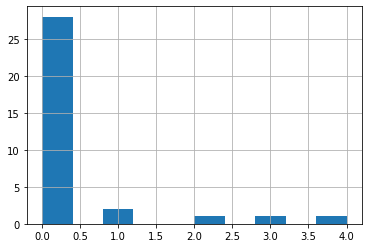

In [18]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count